In [17]:
import numpy as np 
import os 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 

# C2 Results analysis

In [120]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [10]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [122]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [123]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [265]:
accuracies_df.T

Model Accuracy  Ratio of Positive Samples
car            0.578026                   0.461994
chill          0.729230                   0.691183
club           0.726272                   0.408168
dance          0.734654                   0.648862
gym            0.634481                   0.473745
happy          0.601775                   0.405621
night          0.506286                   0.482373
party          0.732681                   0.638836
relax          0.648533                   0.430685
running        0.596105                   0.453694
sad            0.762347                   0.400526
sleep          0.749856                   0.403238
summer         0.615416                   0.532008
work           0.538993                   0.487468
workout        0.675898                   0.402580

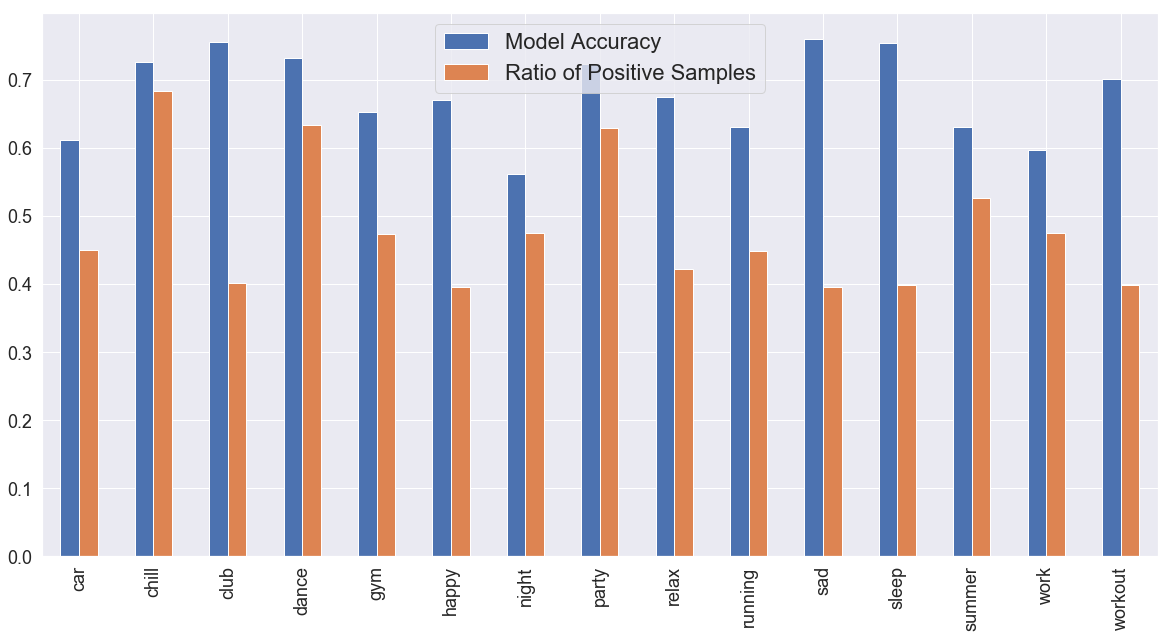

In [125]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [129]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.651236  0.935635   
Ratio of Positive Samples                          0.449973  0.683194   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.709699  0.849817   
Ratio of Positive Samples                          0.401994  0.633612   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.615138  0.494947   
Ratio of Positive Samples                          0.472761  0.396386   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.645216  0.876221   
Ratio of Positive Samples                          0.474453  0.628538   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.630293  0.563132   
Ratio of Positive Samples                          0.422557  0.449083   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.656931  0.660567   
Ratio of Positive Samples                          0.396208  0.398878   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.732984  0.571884   
Ratio of Positive Samples                          0.527061  0.474275   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.564567  
Ratio of Positive Samples                          0.398433

In [130]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

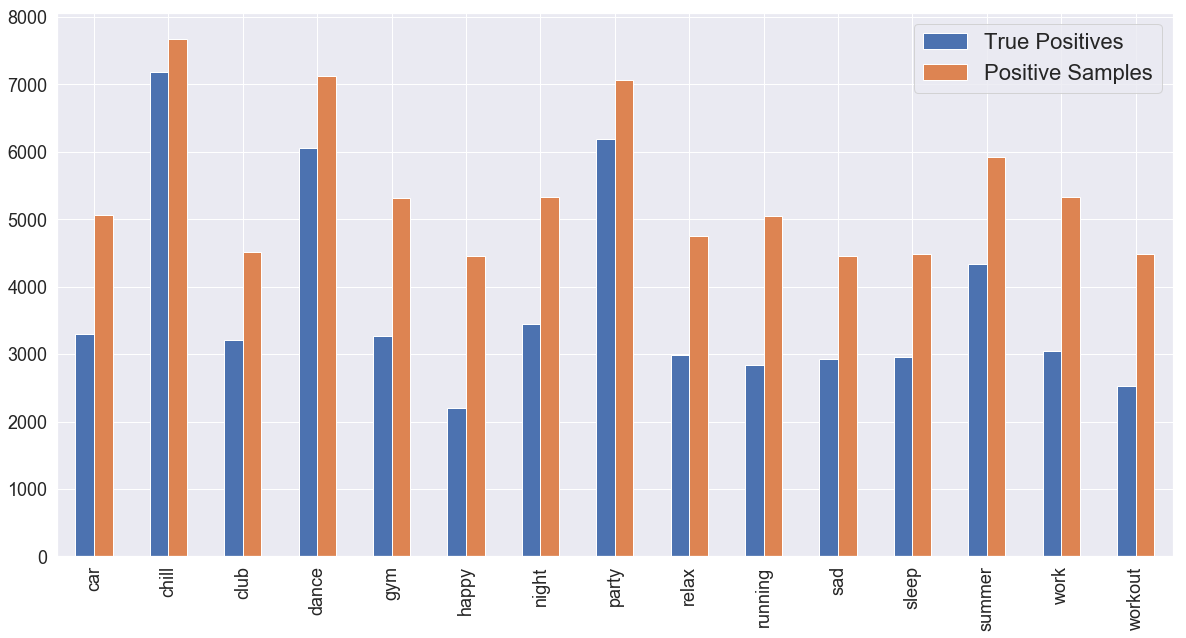

In [131]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [132]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

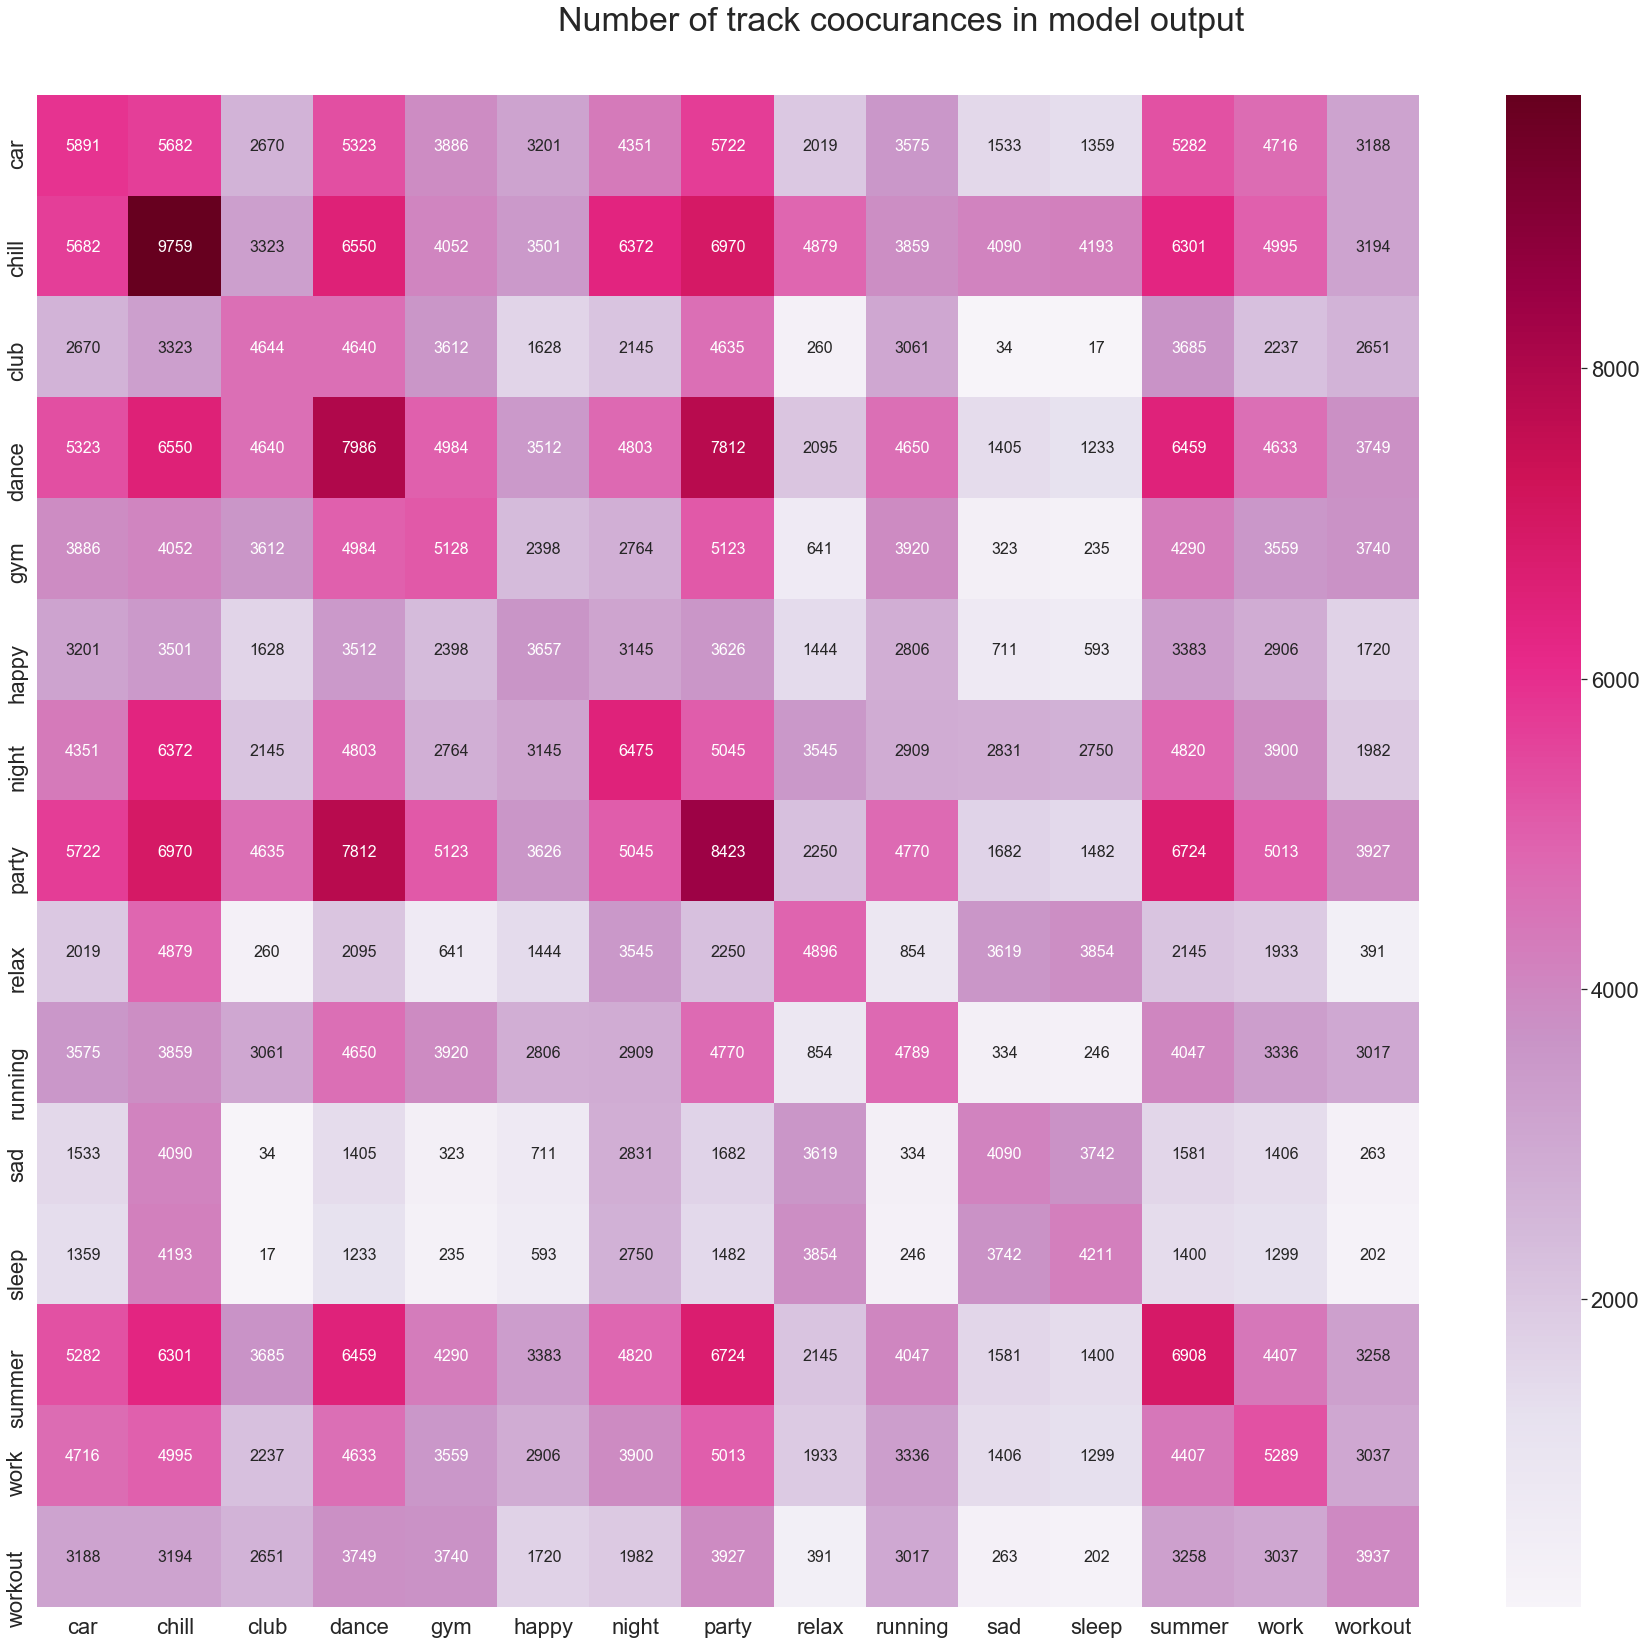

In [133]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [134]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill      club     dance       gym     happy     night  \
0  0.348764  0.064365  0.290301  0.150183  0.384862  0.505053  0.354784   

      party     relax   running       sad     sleep    summer      work  \
0  0.123779  0.369707  0.436868  0.343069  0.339433  0.267016  0.428116   

    workout  
0  0.435433

In [115]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

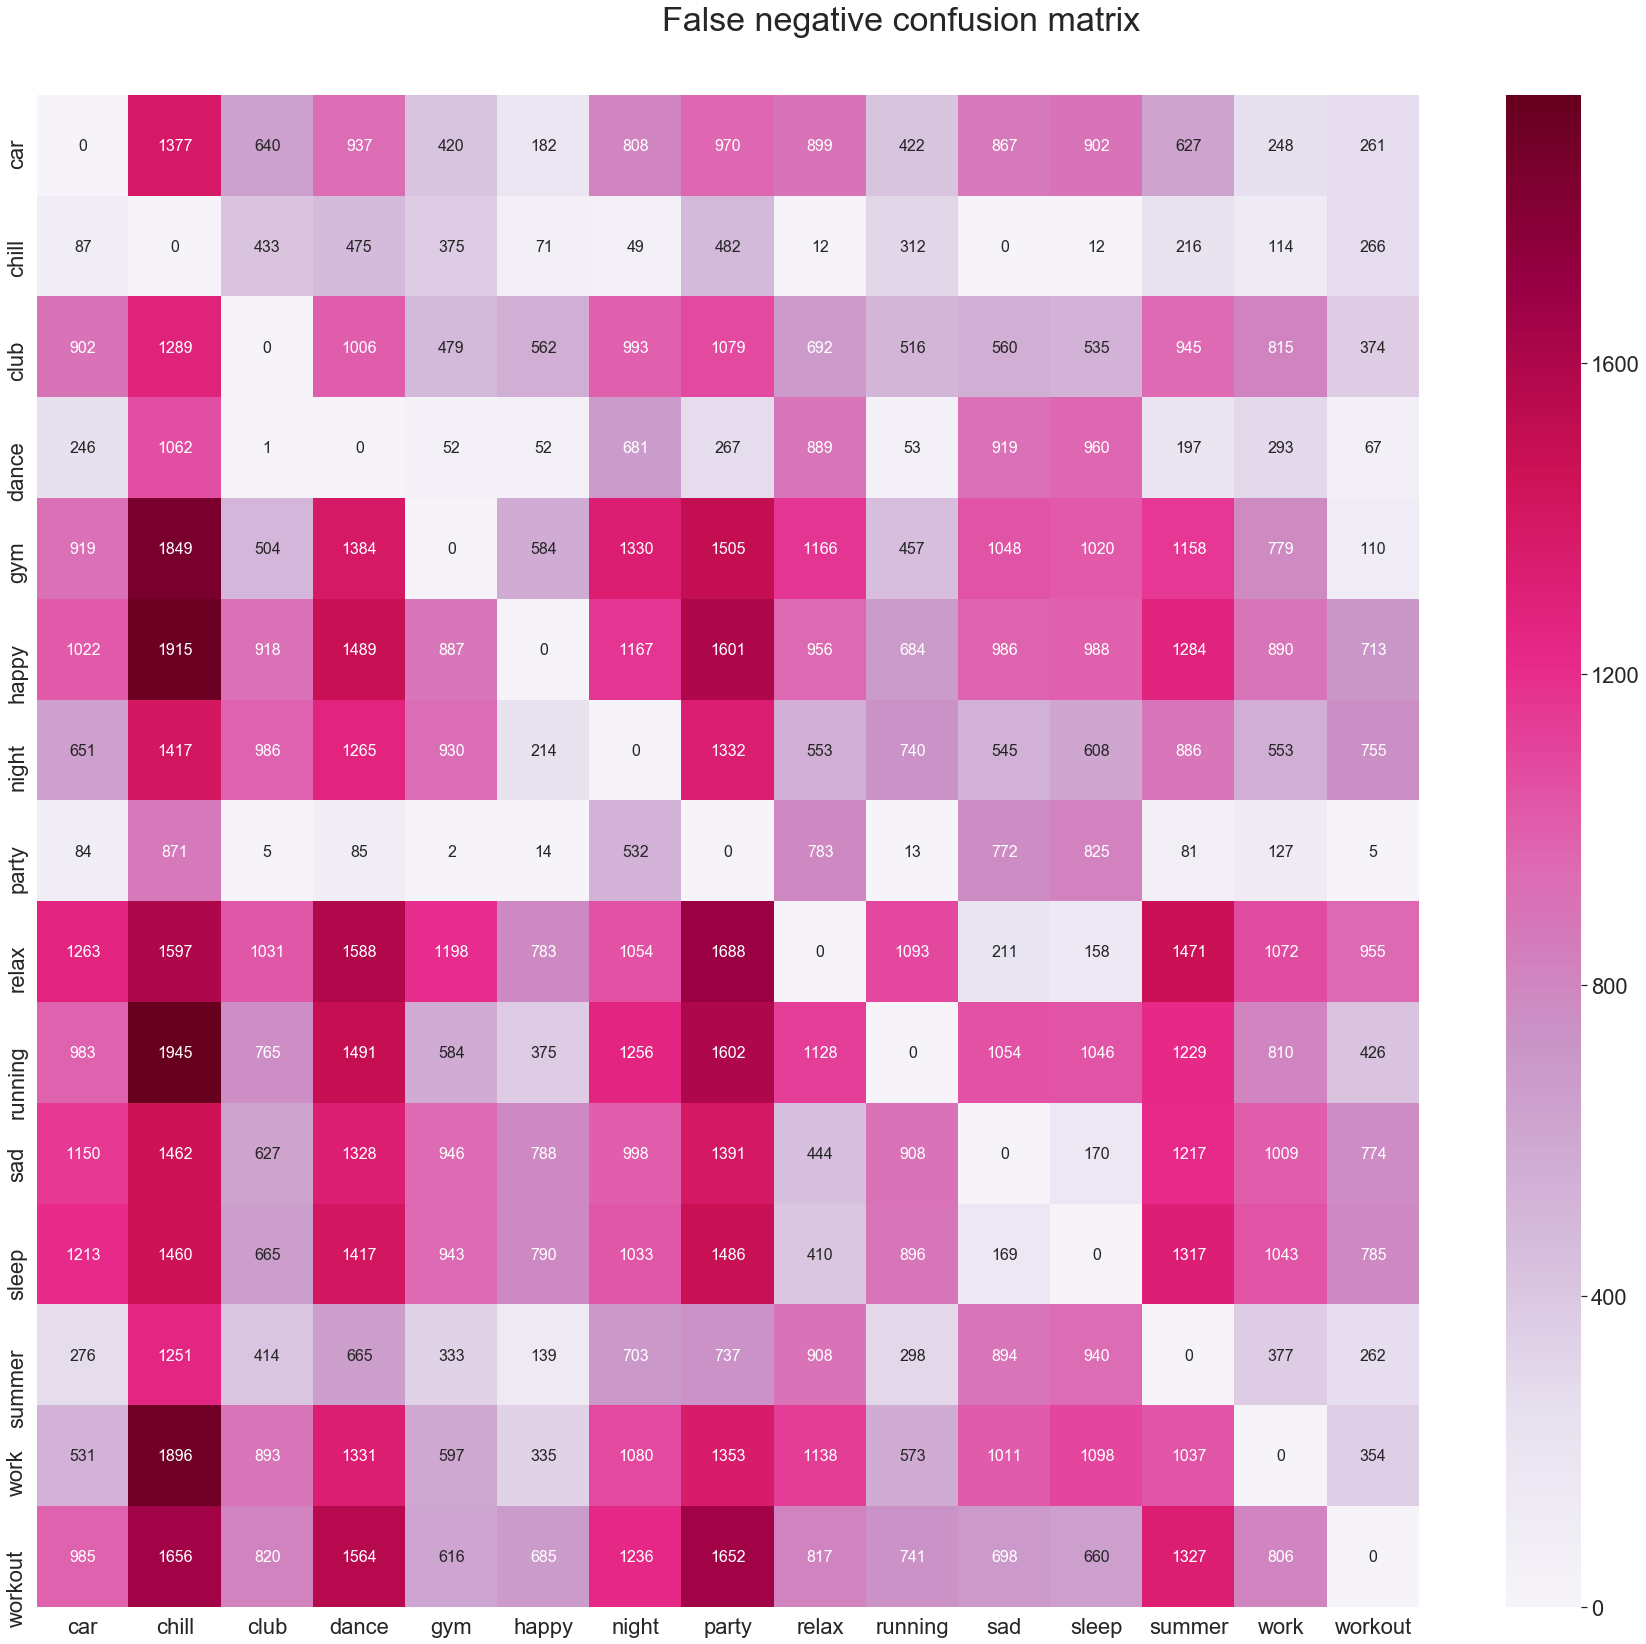

In [118]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

## C4 Old test set performance

In [259]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'oldpredictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'oldtest_ground_truth_classes.txt'), delimiter=',')

In [260]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [261]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [262]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [263]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.597726  0.620584  0.678768  0.681824  0.568268   
Ratio of Positive Samples  0.214155  0.466691  0.087153  0.514974  0.253270   

                              happy     night     party     relax   running  \
Model Accuracy             0.667522  0.648454  0.607016  0.731818  0.520719   
Ratio of Positive Samples  0.128102  0.160983  0.482948  0.194964  0.206332   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.750764  0.715072  0.575235  0.529153  0.667278  
Ratio of Positive Samples  0.129813  0.083608  0.277105  0.211343  0.210365

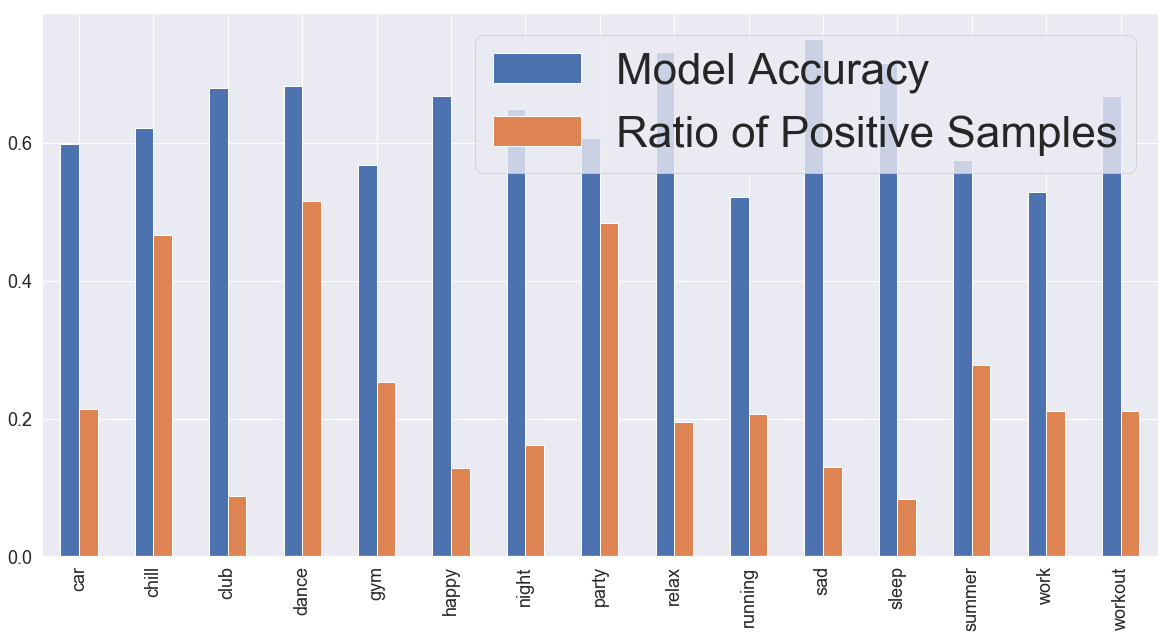

In [264]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)

In [265]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.552511  0.916972   
Ratio of Positive Samples                          0.214155  0.466691   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.530154  0.829812   
Ratio of Positive Samples                          0.087153  0.514974   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.725869  0.480916   
Ratio of Positive Samples                          0.253270  0.128102   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.378891  0.870919   
Ratio of Positive Samples                          0.160983  0.482948   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.611285  0.680687   
Ratio of Positive Samples                          0.194964  0.206332   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.771186  0.767544   
Ratio of Positive Samples                          0.129813  0.083608   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.611822  0.636206   
Ratio of Positive Samples                          0.277105  0.211343   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.686810  
Ratio of Positive Samples                          0.210365

In [266]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n [unbalanced] Average true positive rate: 0.67')

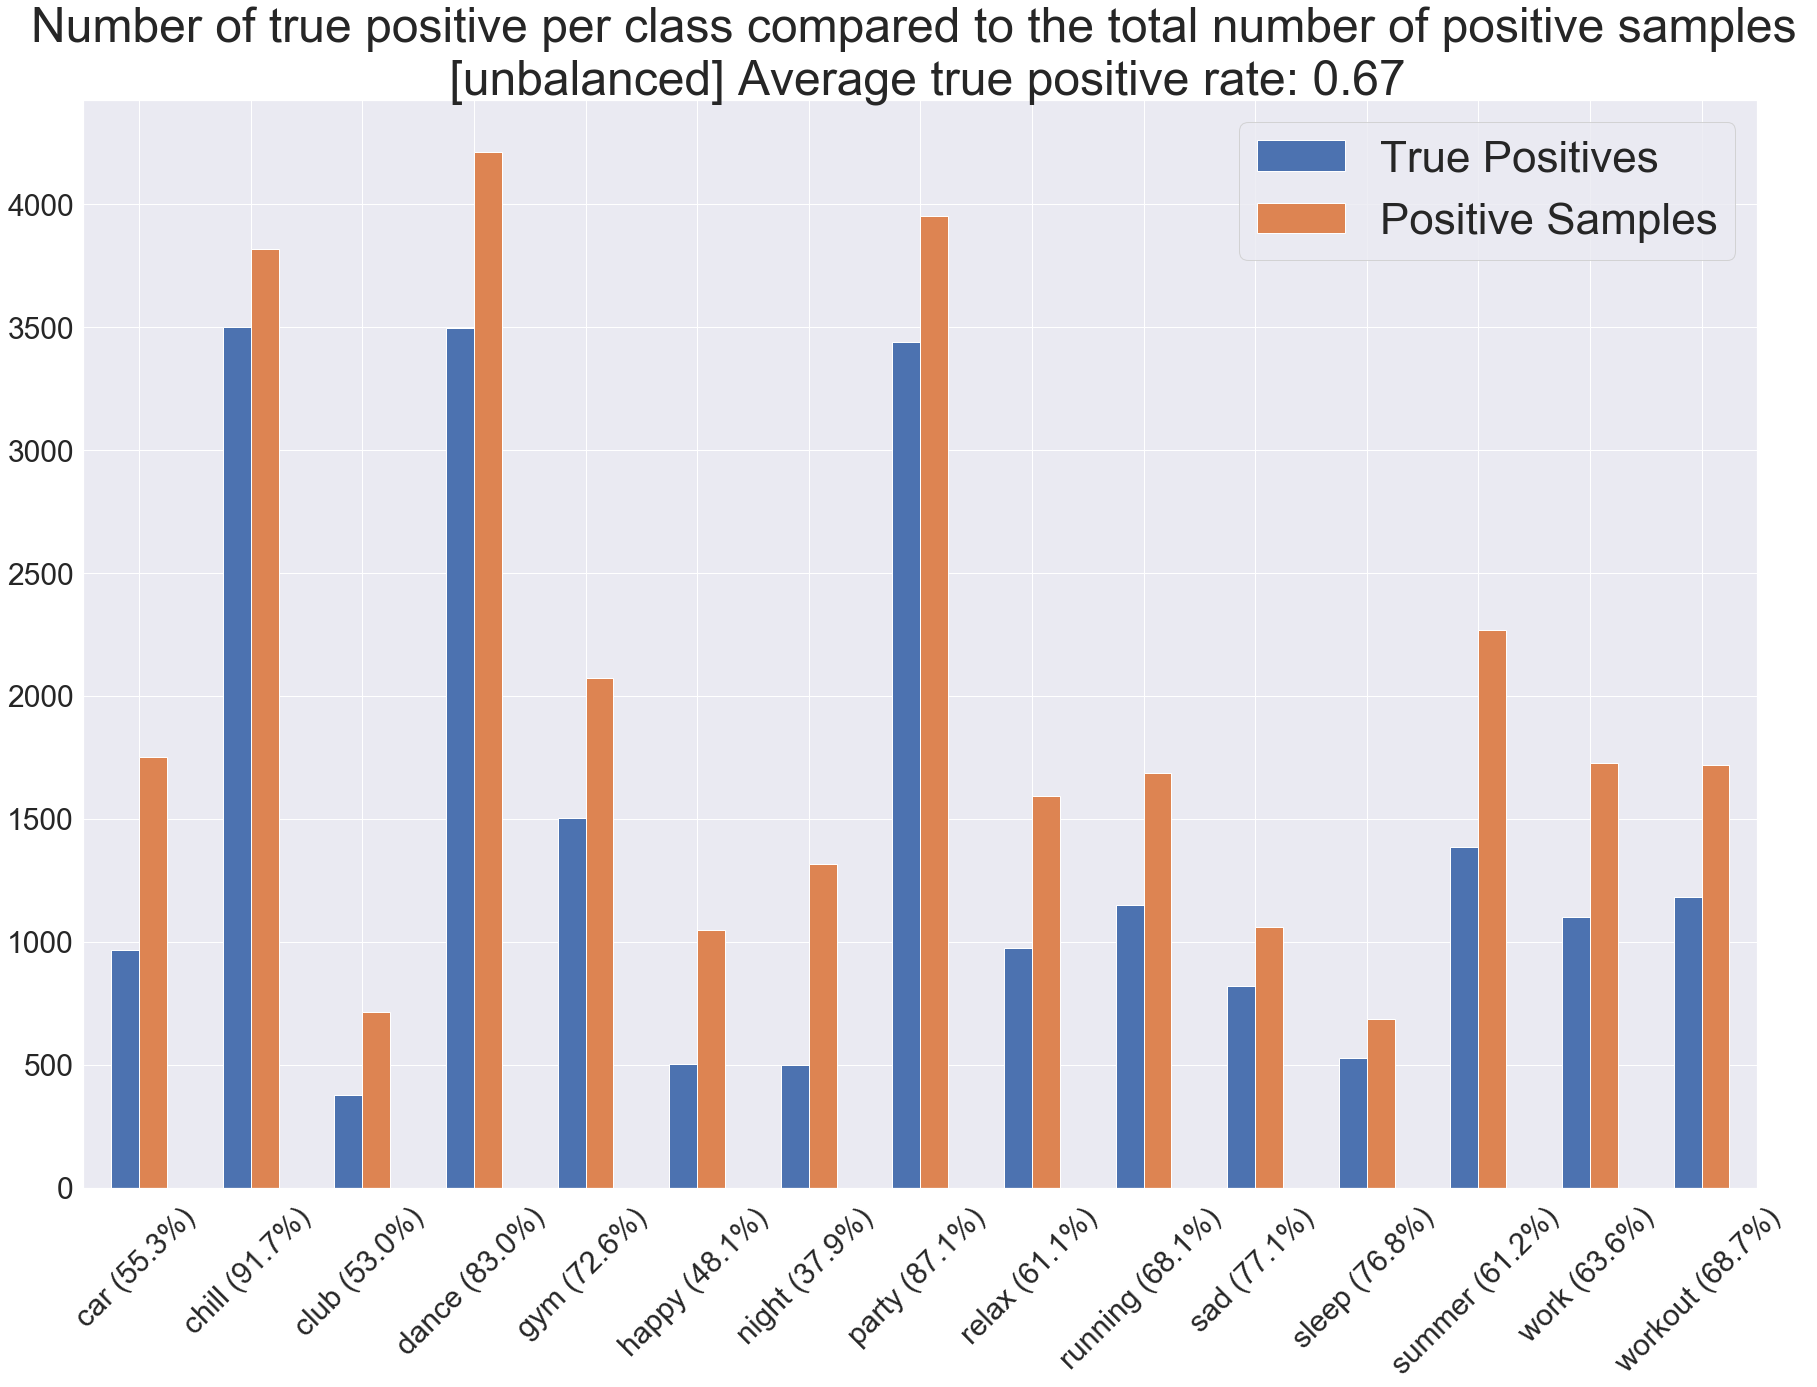

In [268]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n [unbalanced] Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [221]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

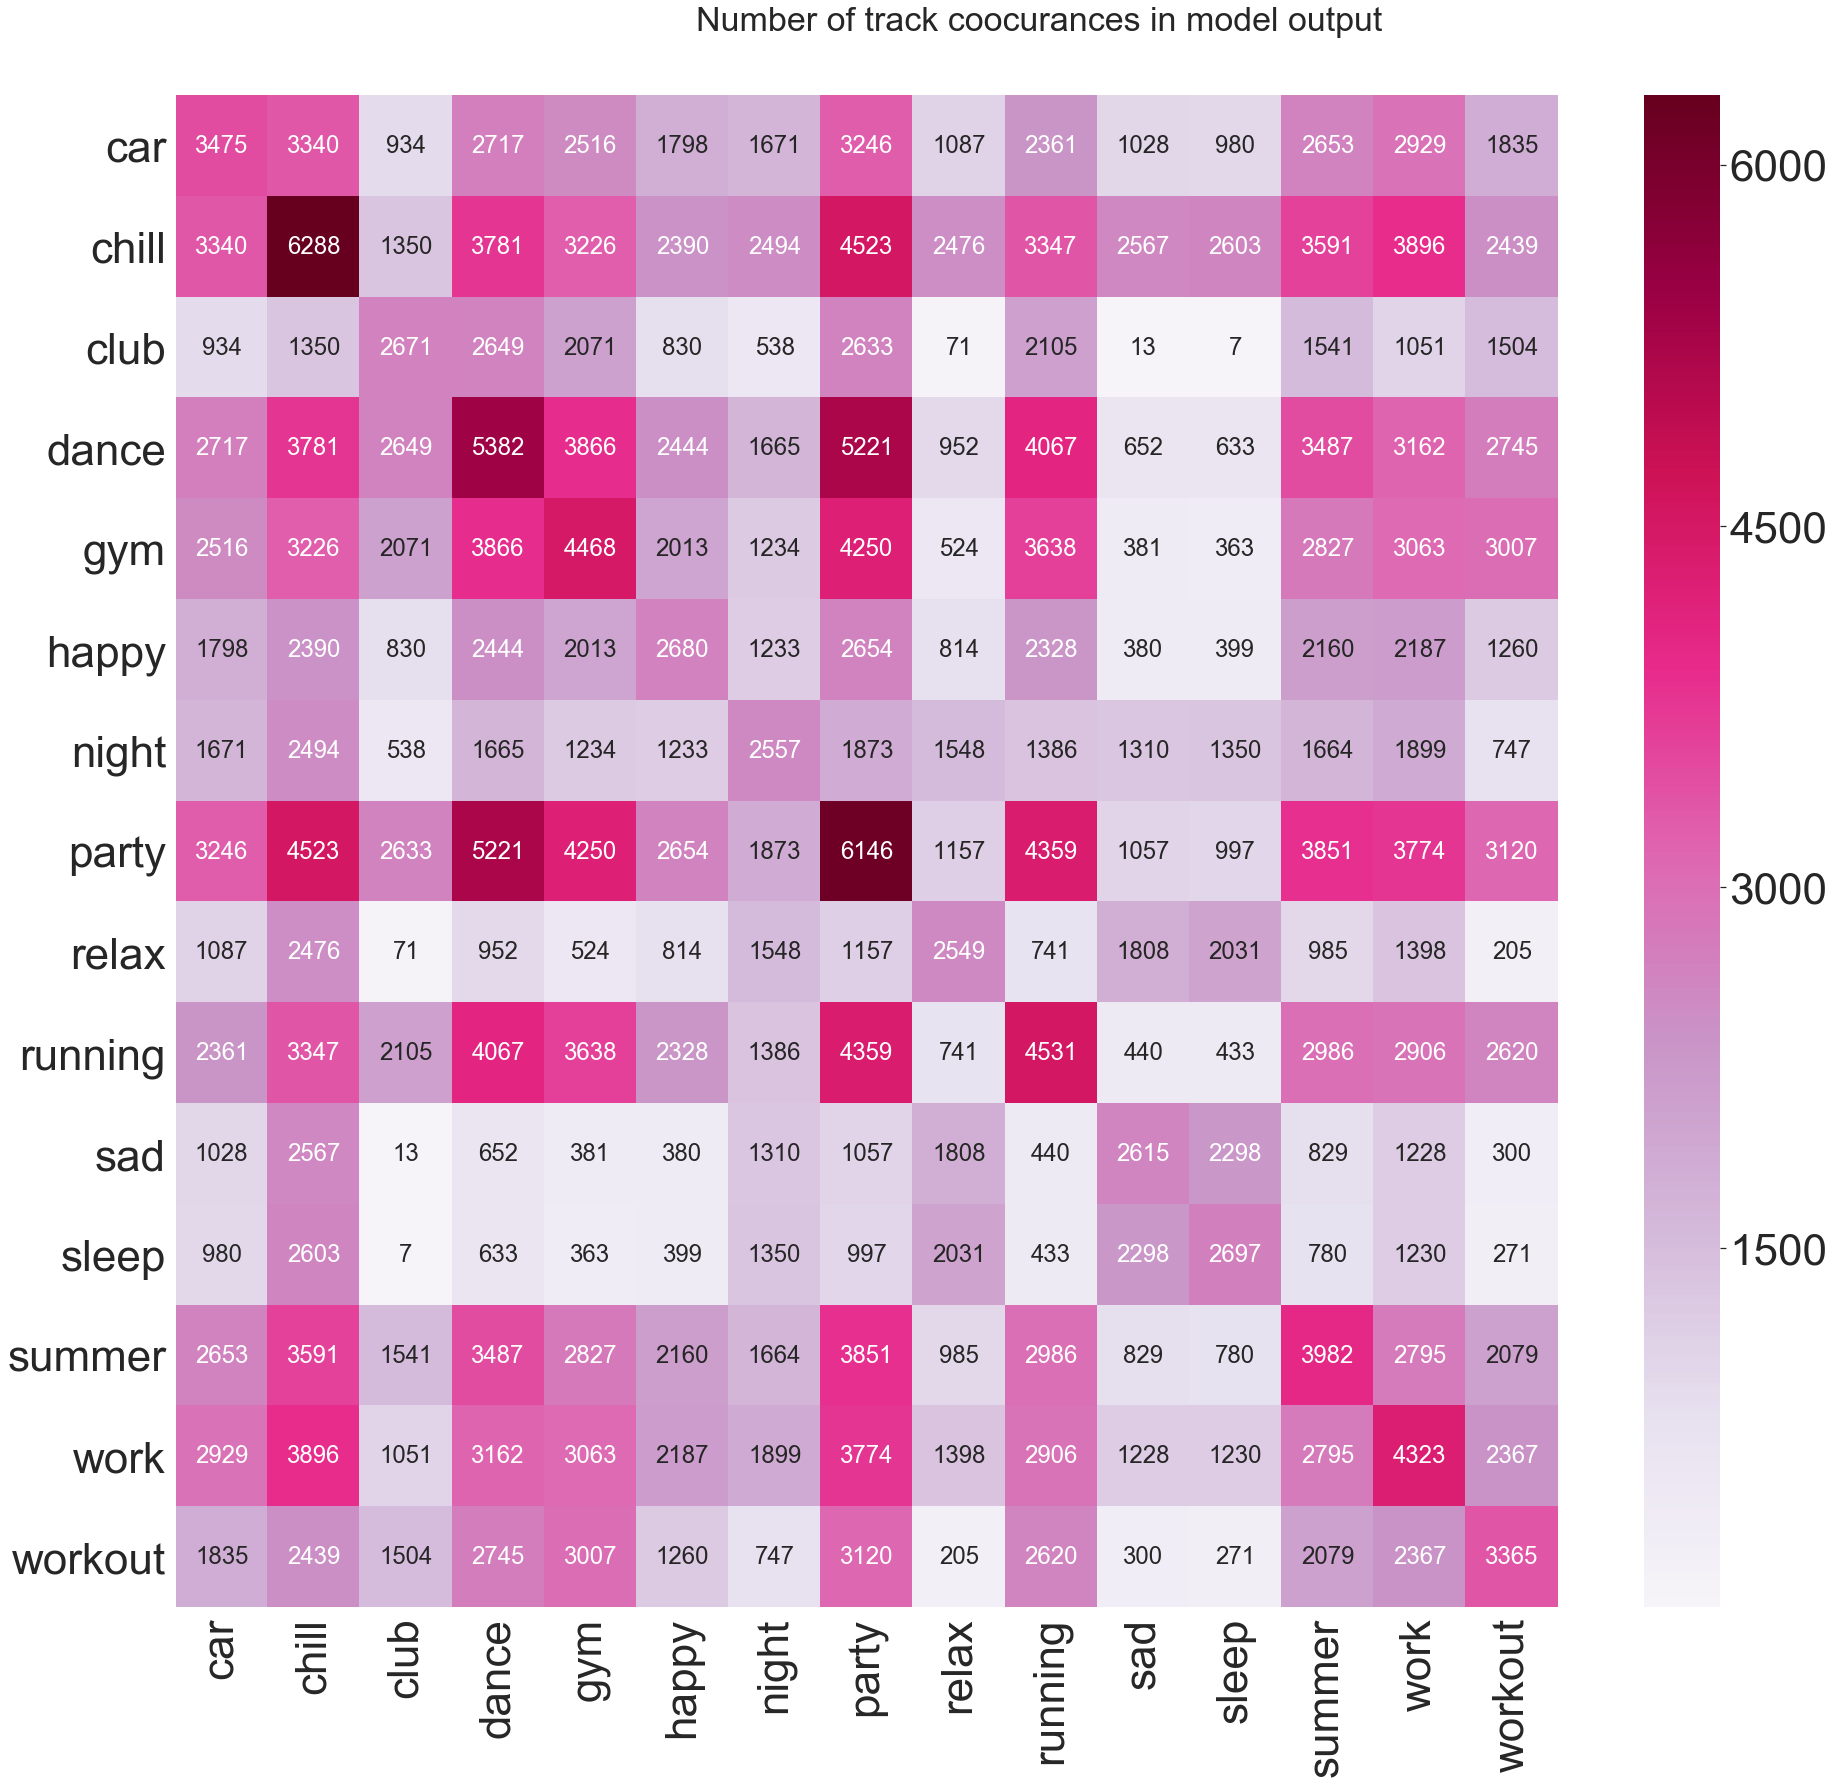

In [222]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

In [227]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill      club     dance       gym     happy     night  \
0  0.447489  0.083028  0.469846  0.170188  0.274131  0.519084  0.621109   

      party     relax   running       sad     sleep    summer      work  \
0  0.129081  0.388715  0.319313  0.228814  0.232456  0.388178  0.363794   

   workout  
0  0.31319

In [228]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

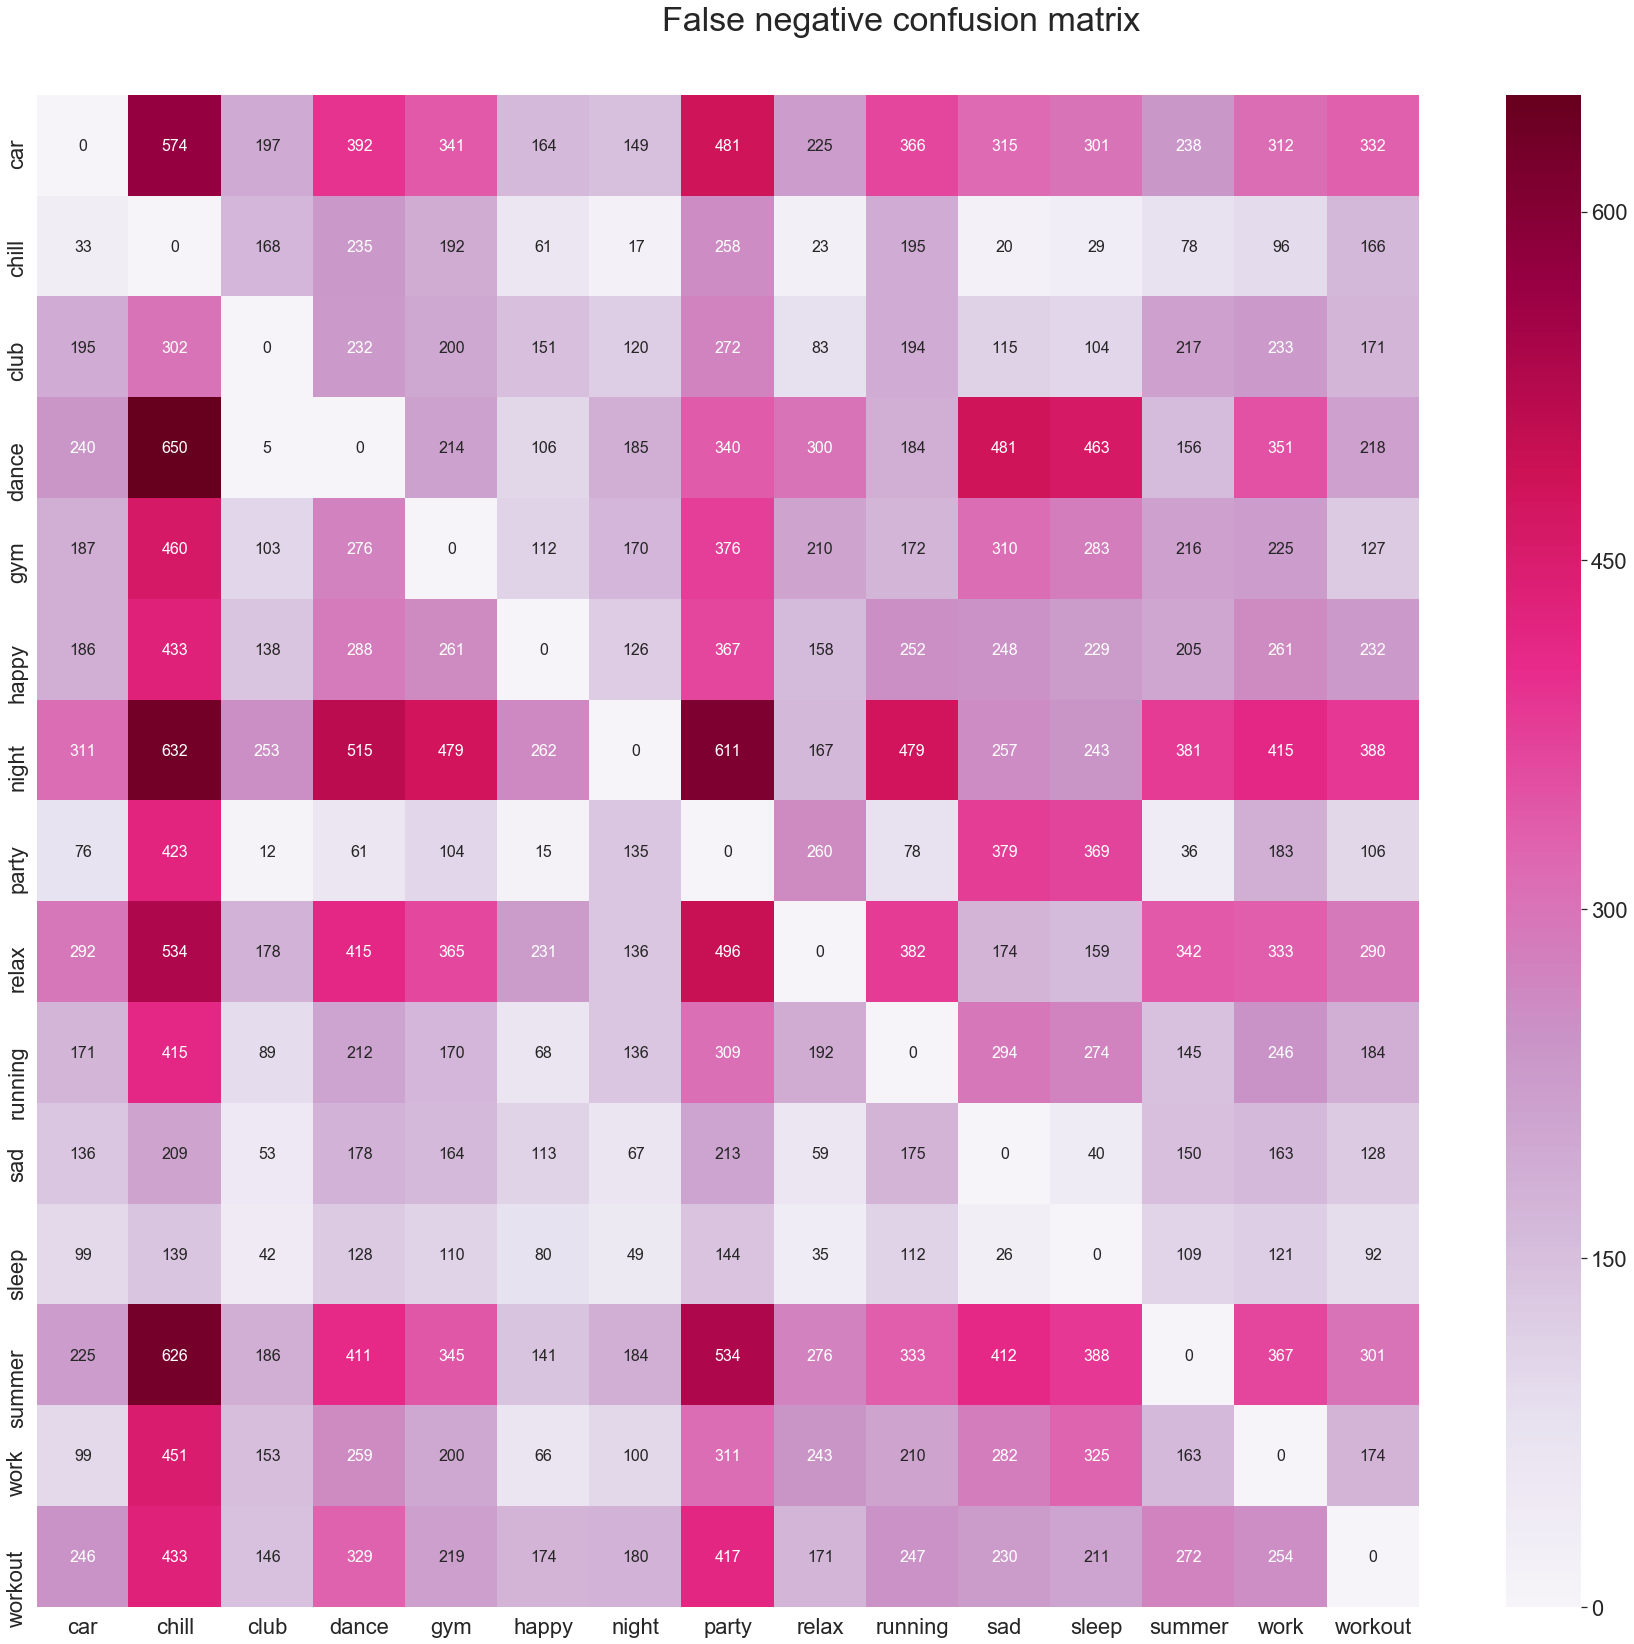

In [229]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [230]:
true_positives_ratio_perclass.mean()

0.6701057200832057

In [231]:
# Getting coocuarances
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_classes_df.columns)
for column in test_classes_df.columns:
    coocurrances[column] = test_classes_df[test_classes_df[column] == 1].sum()
coocurrances = coocurrances.T

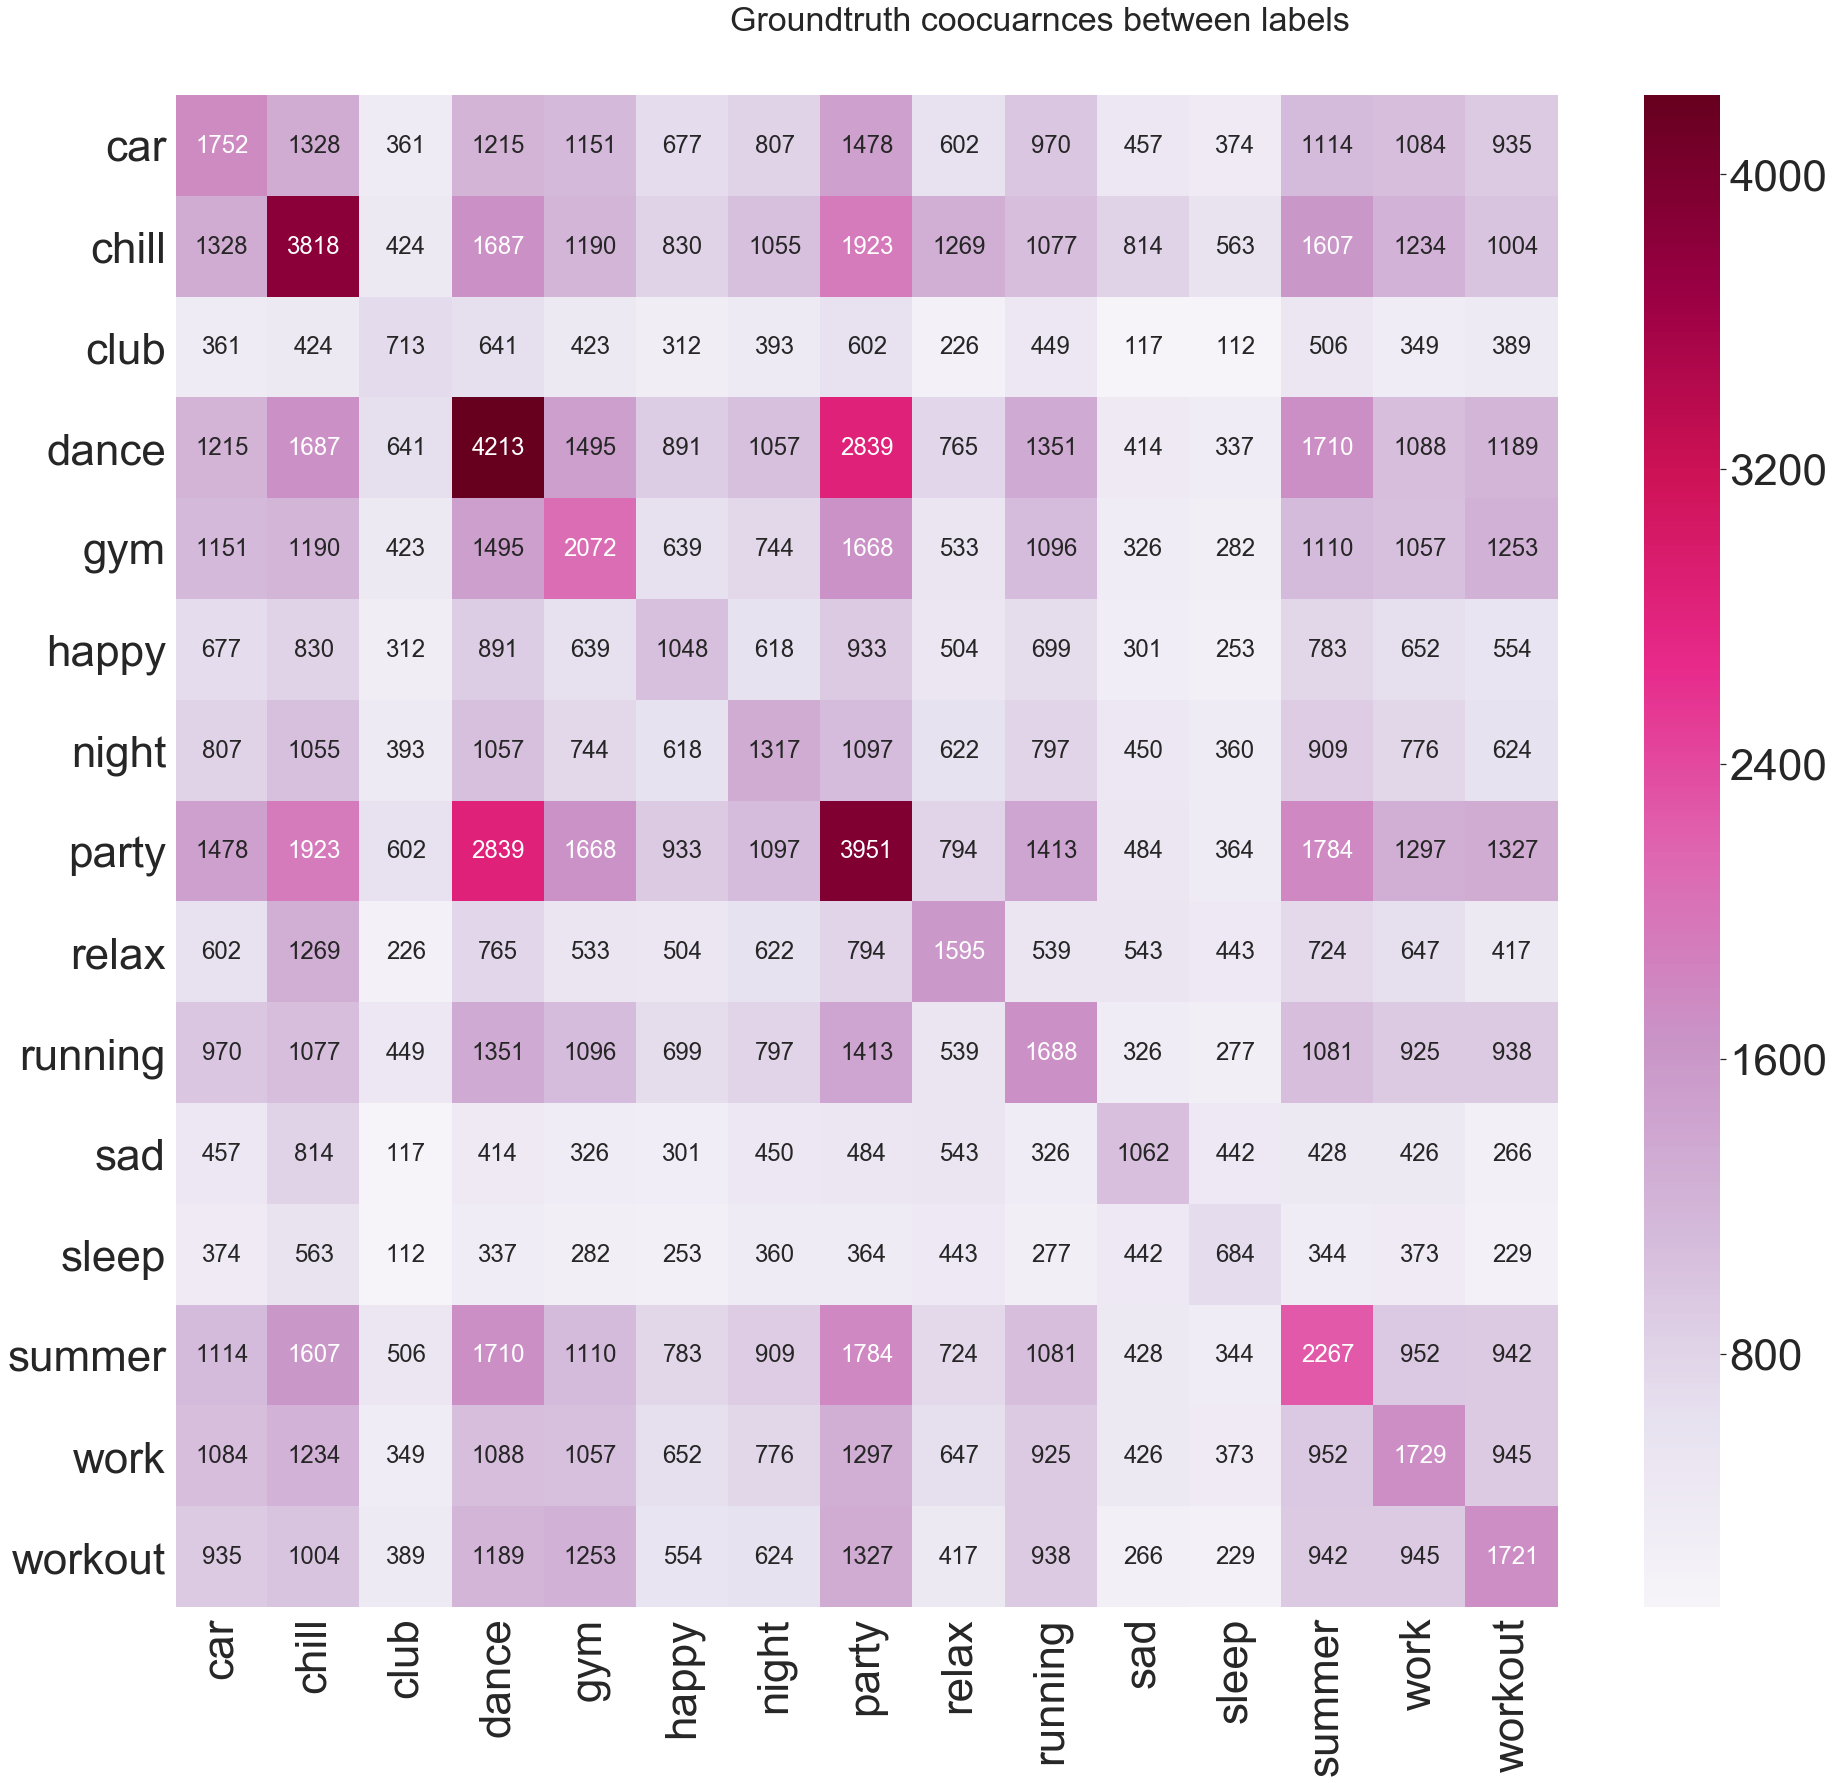

In [232]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Groundtruth coocuarnces between labels', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

## C4 results

In [206]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [207]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [208]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [209]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [210]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.601282  0.727751  0.748541  0.740159  0.660449   
Ratio of Positive Samples  0.461994  0.691183  0.408168  0.648862  0.473745   

                              happy     night     party     relax   running  \
Model Accuracy             0.666037  0.561180  0.735147  0.683211  0.623963   
Ratio of Positive Samples  0.405621  0.482373  0.638836  0.430685  0.453694   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.770071  0.761690  0.633988  0.586983  0.698003  
Ratio of Positive Samples  0.400526  0.403238  0.532008  0.487468  0.402580

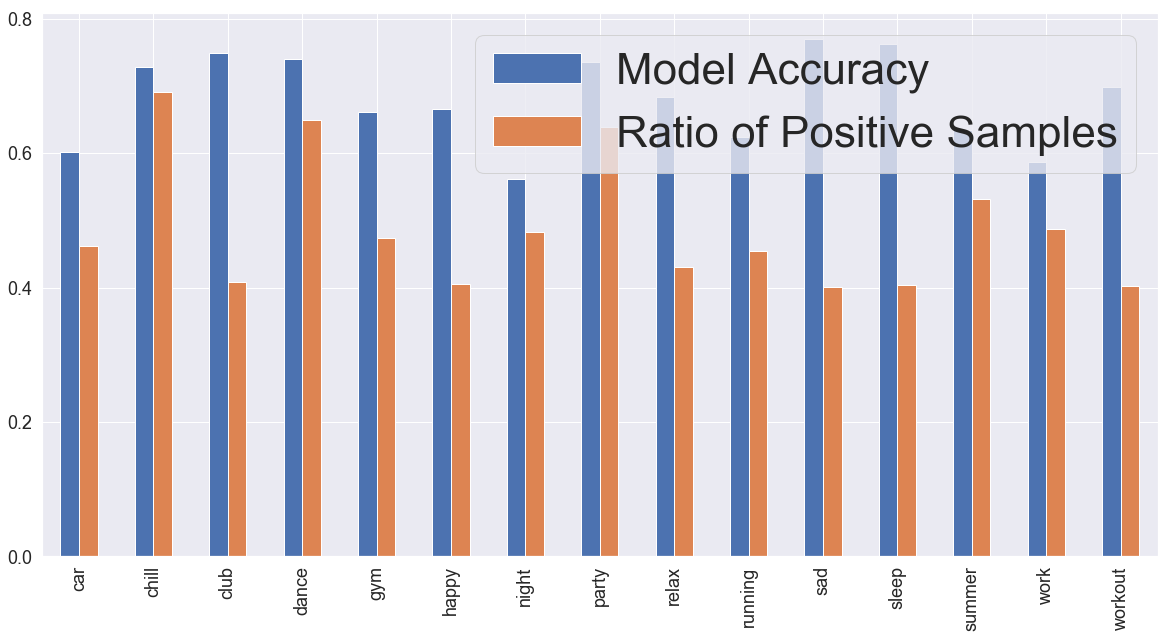

In [211]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [212]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.519032  0.912733   
Ratio of Positive Samples                          0.461994  0.691183   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.695591  0.842958   
Ratio of Positive Samples                          0.408168  0.648862   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.750390  0.435170   
Ratio of Positive Samples                          0.473745  0.405621   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.406985  0.863905   
Ratio of Positive Samples                          0.482373  0.638836   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.571074  0.622351   
Ratio of Positive Samples                          0.430685  0.453694   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.679934  0.657632   
Ratio of Positive Samples                          0.400526  0.403238   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.723046  0.496966   
Ratio of Positive Samples                          0.532008  0.487468   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.670749  
Ratio of Positive Samples                          0.402580

In [213]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass
f1_score_perclass = f1_score(test_classes, test_pred,average=None)

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n Average true positive rate: 0.66')

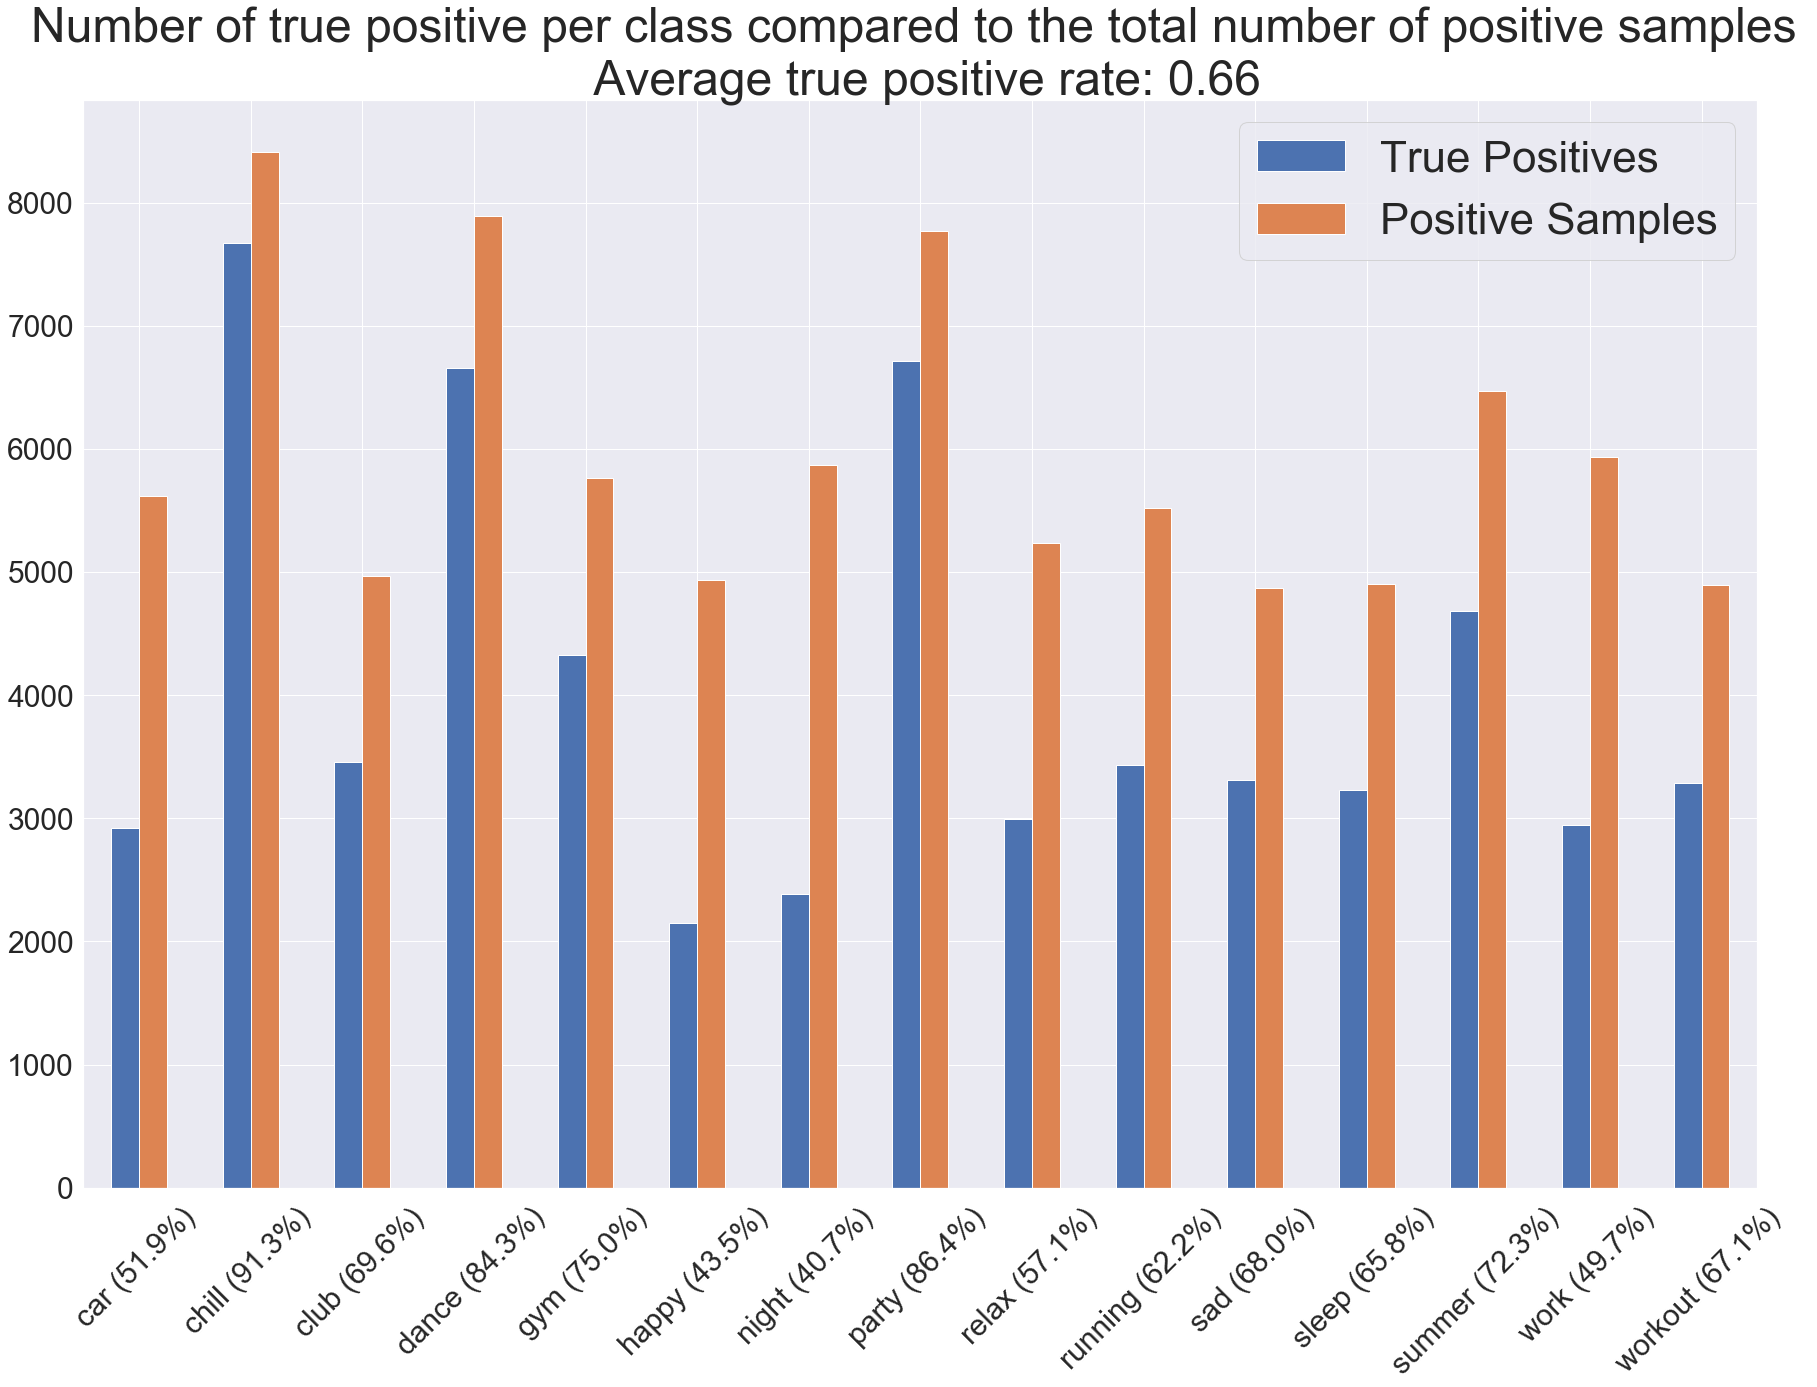

In [214]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [47]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

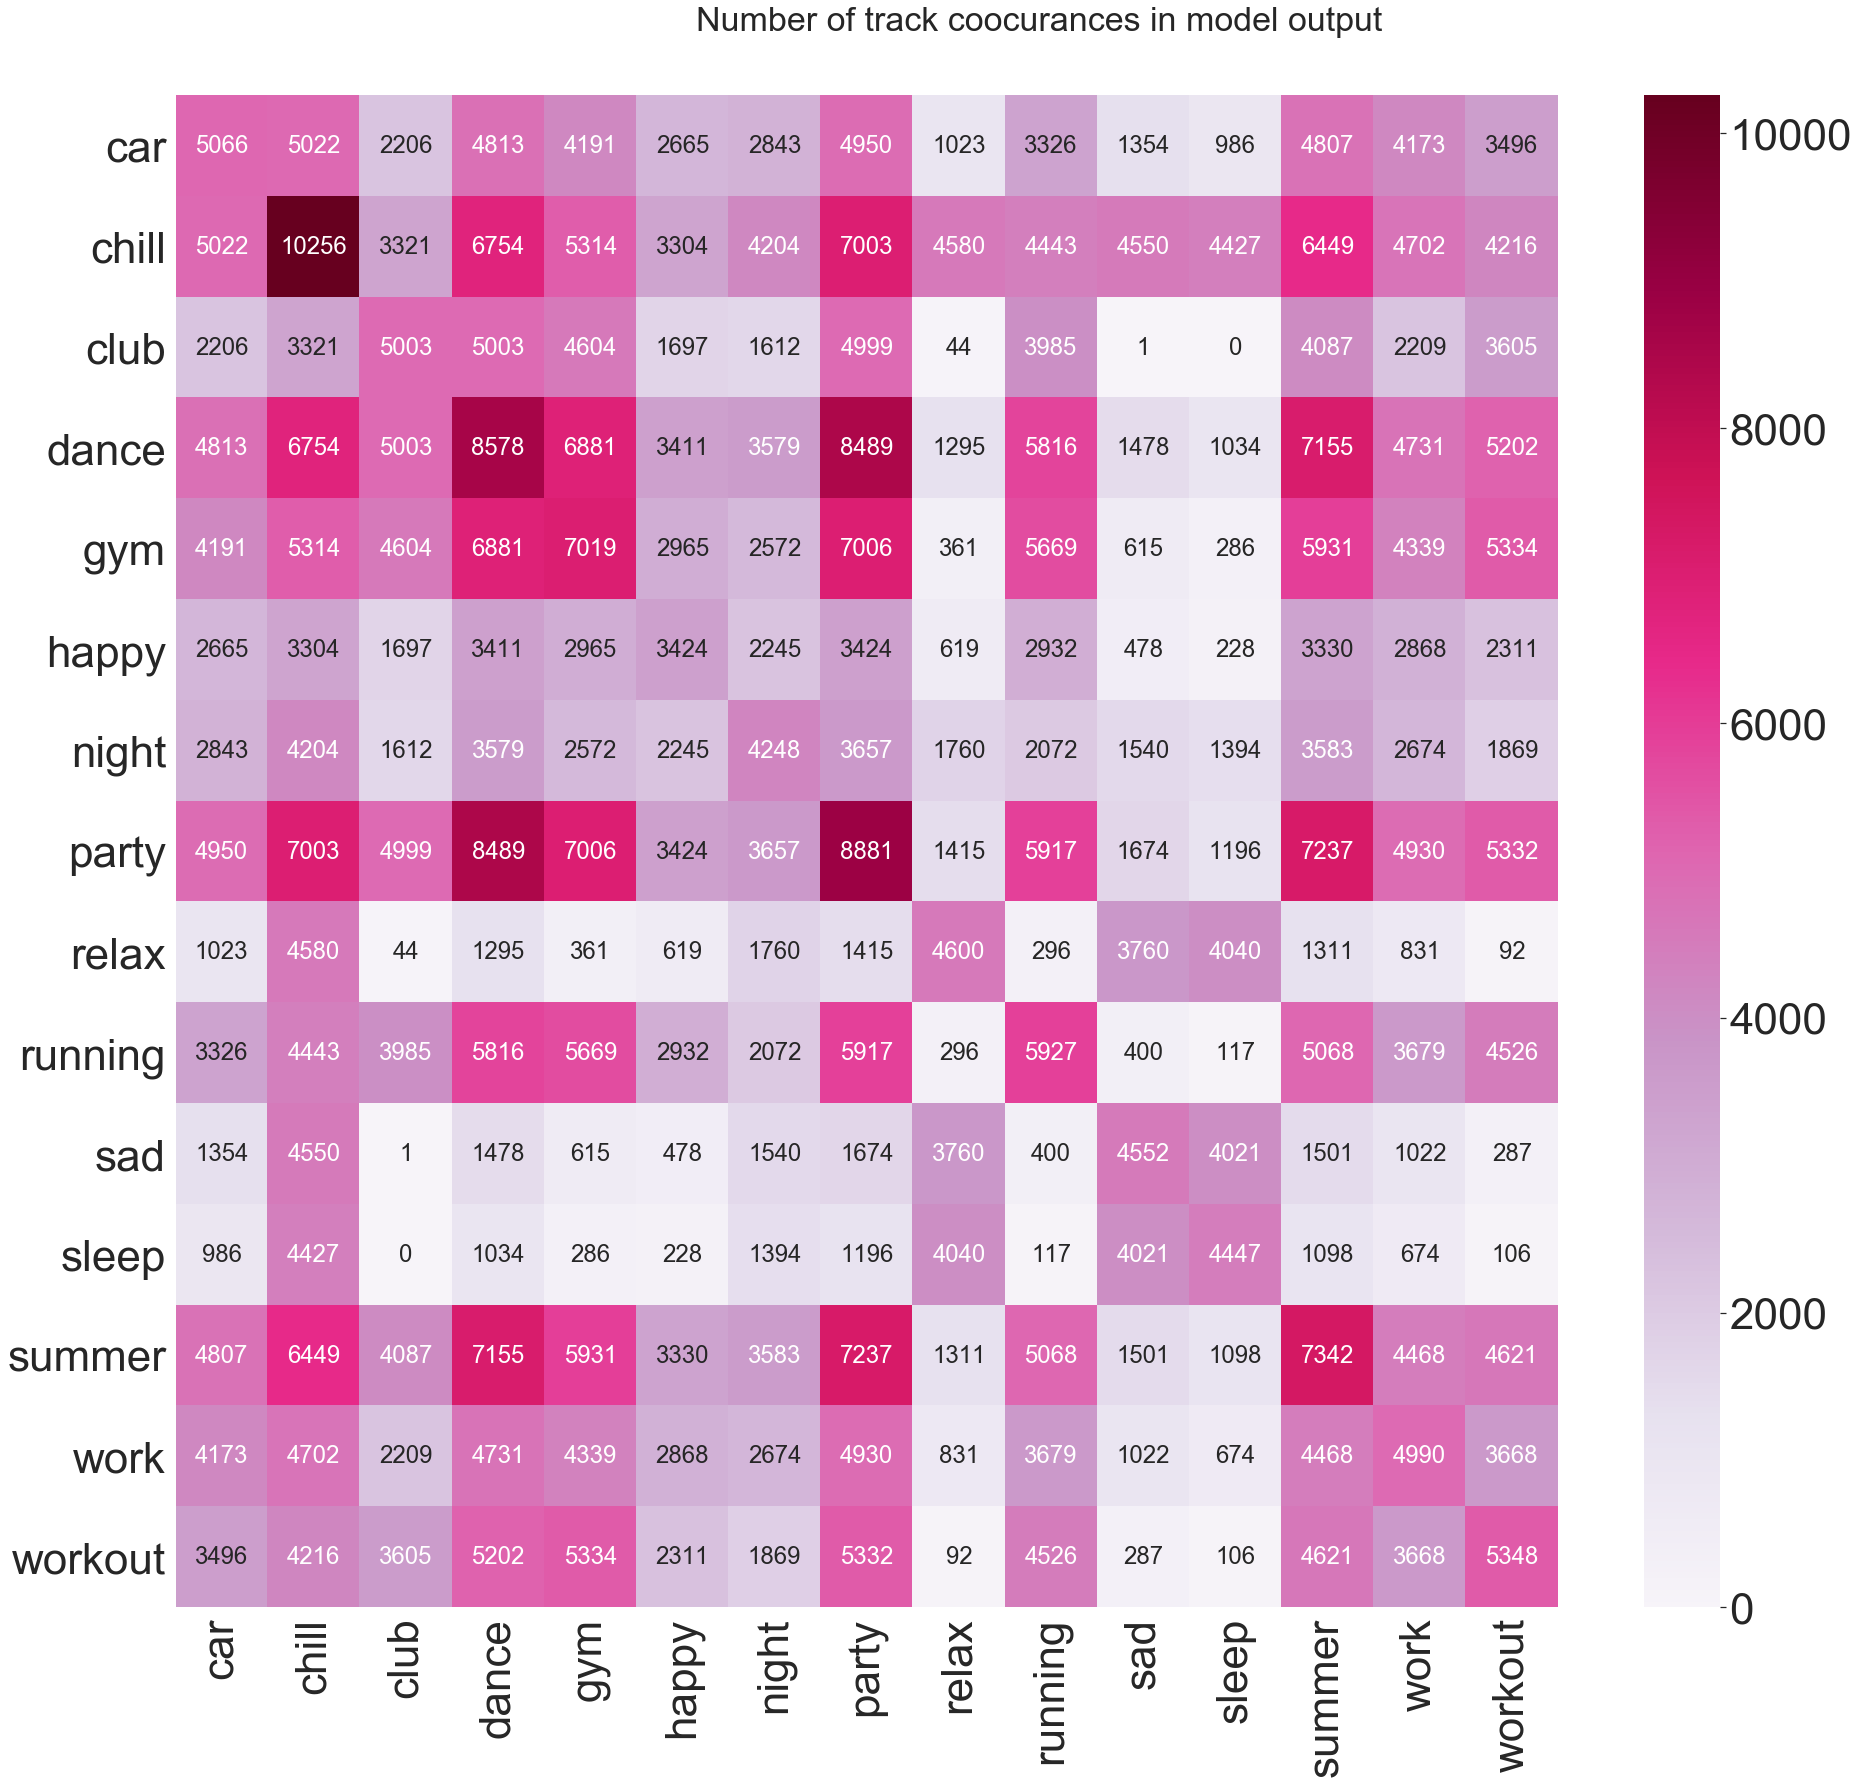

In [48]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

In [49]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill      club     dance      gym    happy     night  \
0  0.480968  0.087267  0.304409  0.157042  0.24961  0.56483  0.593015   

      party     relax   running       sad     sleep    summer      work  \
0  0.136095  0.428926  0.377649  0.320066  0.342368  0.276954  0.503034   

    workout  
0  0.329251

In [50]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

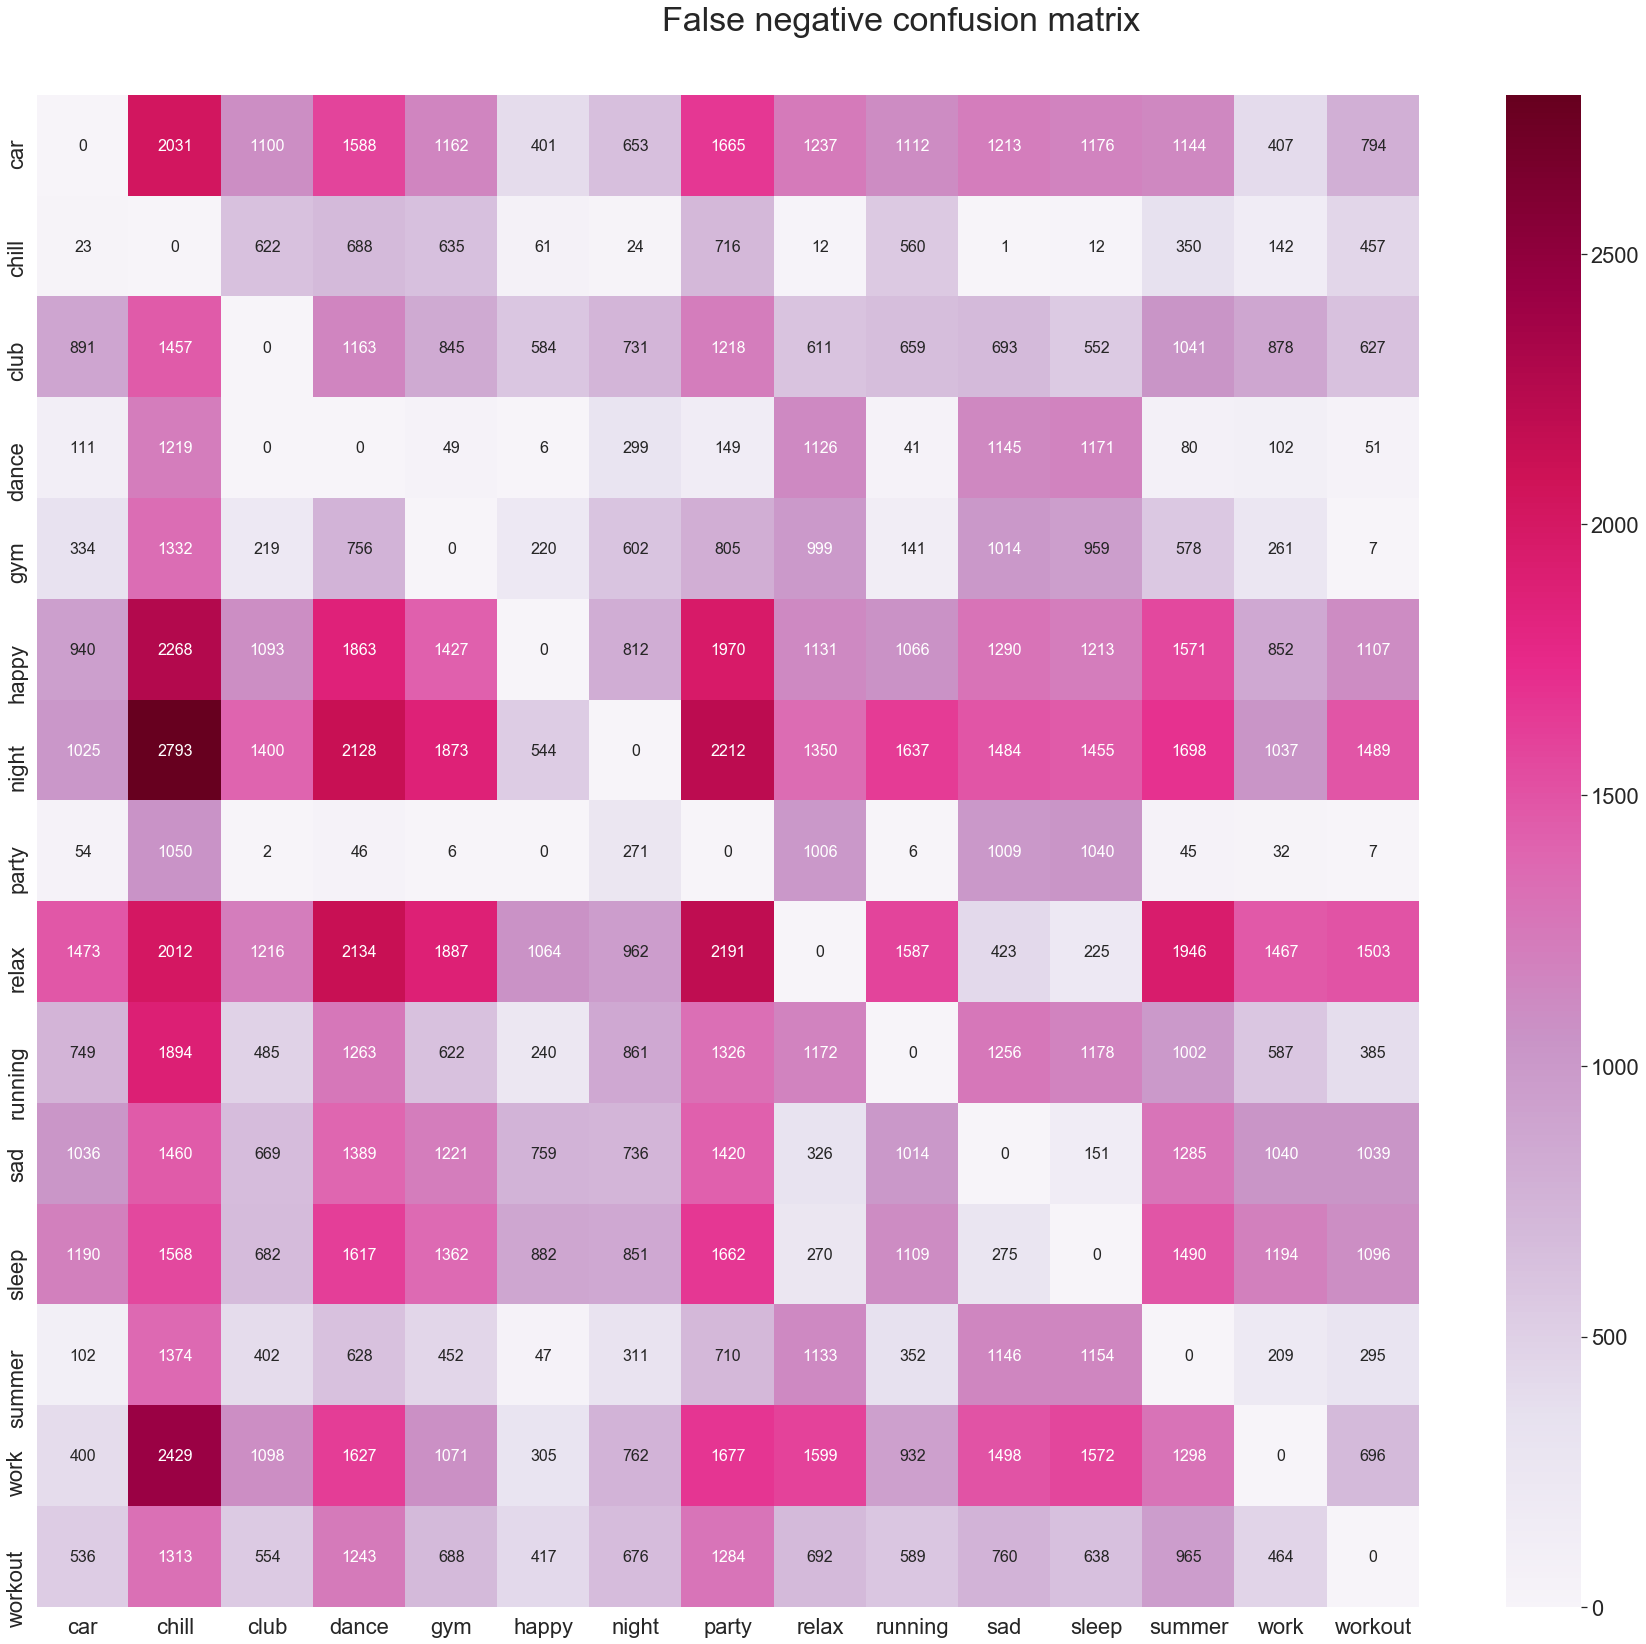

In [51]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [52]:
true_positives_ratio_perclass.mean()

0.6565678556390522

In [149]:
# Getting coocuarances
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_classes_df.columns)
for column in test_classes_df.columns:
    coocurrances[column] = test_classes_df[test_classes_df[column] == 1].sum()
coocurrances = coocurrances.T

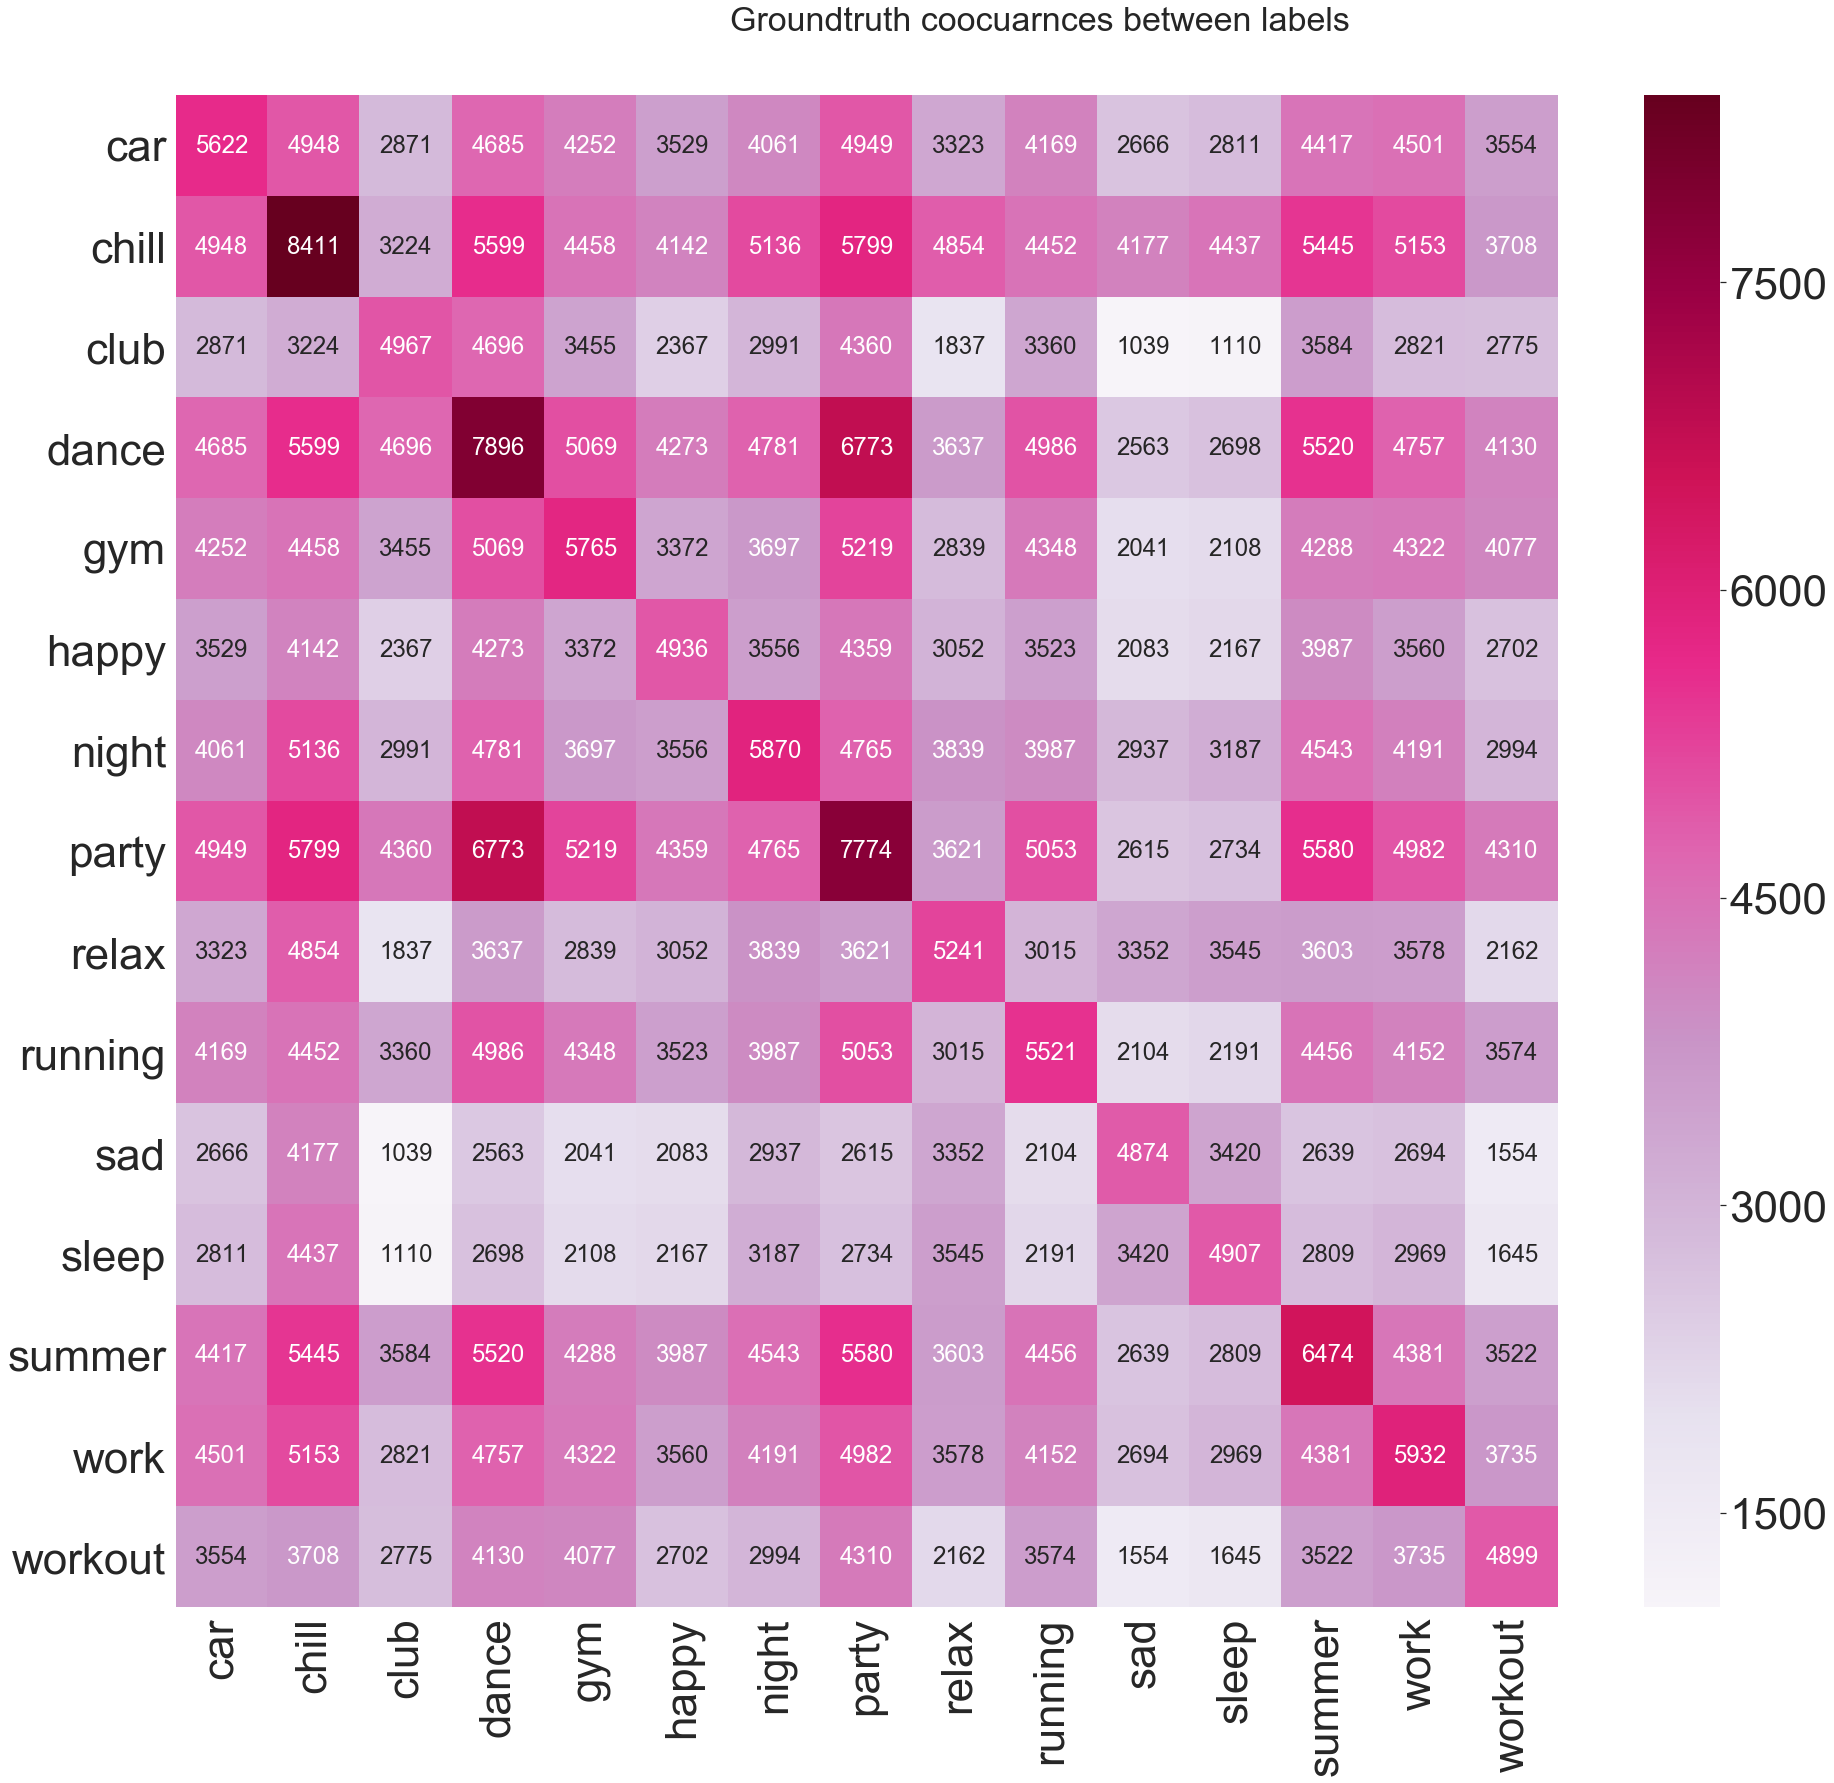

In [150]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Groundtruth coocuarnces between labels', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

## Changing threshold

*Need to generate validation ground truth and predictions*

In [225]:
# Get the optimum thresholds from the validation set predictions
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/'
                                         , 'validpredictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/',
                                       'valid_ground_truth_classes.txt'), delimiter=',')

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
auc_roc_per_label = roc_auc_score(test_classes, test_pred_prob, average = None) 

In [227]:
auc_roc_per_label_df = pd.DataFrame(auc_roc_per_label.reshape(1,15))
auc_roc_per_label_df.columns = LABELS_LIST
auc_roc_per_label_df

car     chill      club     dance      gym     happy   night  \
0  0.661081  0.714841  0.815515  0.791847  0.71872  0.697686  0.5816   

      party     relax  running       sad     sleep    summer      work  \
0  0.752597  0.713037  0.68234  0.819279  0.806094  0.680145  0.642715   

    workout  
0  0.774729

Text(0.5, 1.0, 'AUC value per class')

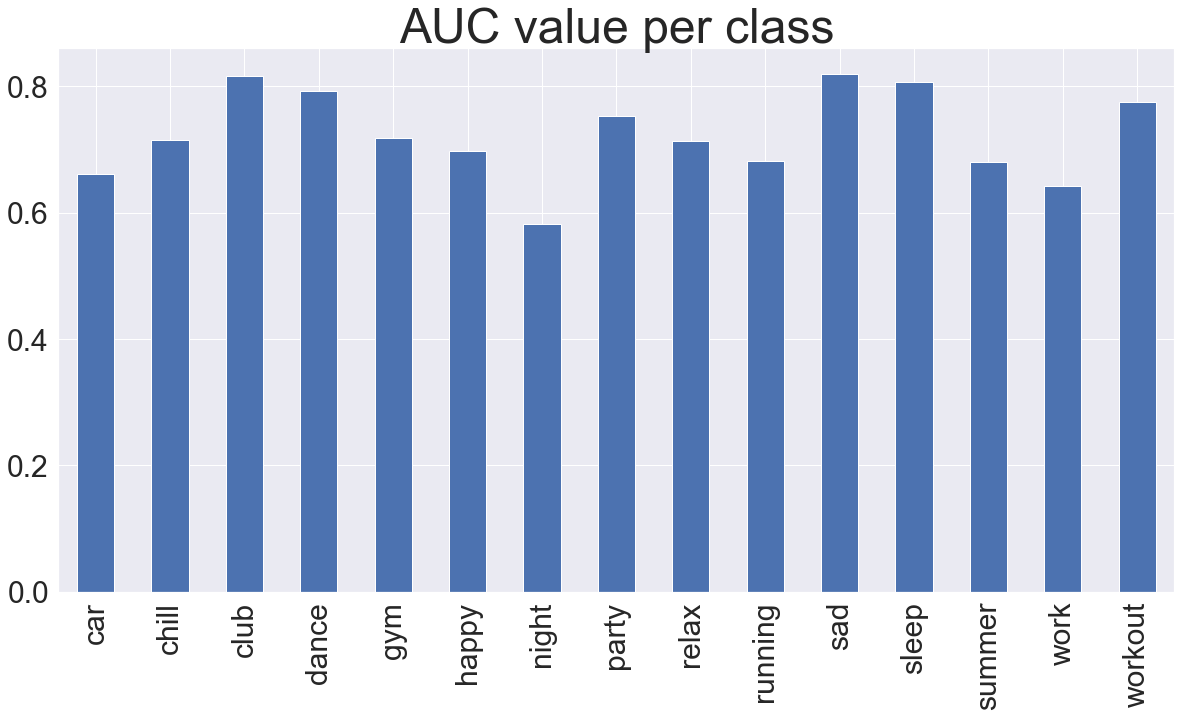

In [228]:
auc_roc_per_label_df.T.plot.bar(figsize=(20,10),fontsize = 30,legend=False)
plt.title("AUC value per class")

In [229]:
thresholds = np.arange(0,1,0.01)
f1_array = np.zeros((len(LABELS_LIST),len(thresholds)))
for idx, label in enumerate(LABELS_LIST):
    f1_array[idx,:] = [f1_score(test_classes[:,idx], np.round(test_pred_prob[:,idx]-threshold+0.5)) 
                       for threshold in thresholds]

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'F1 Score vs different prediction threshold values for each class')

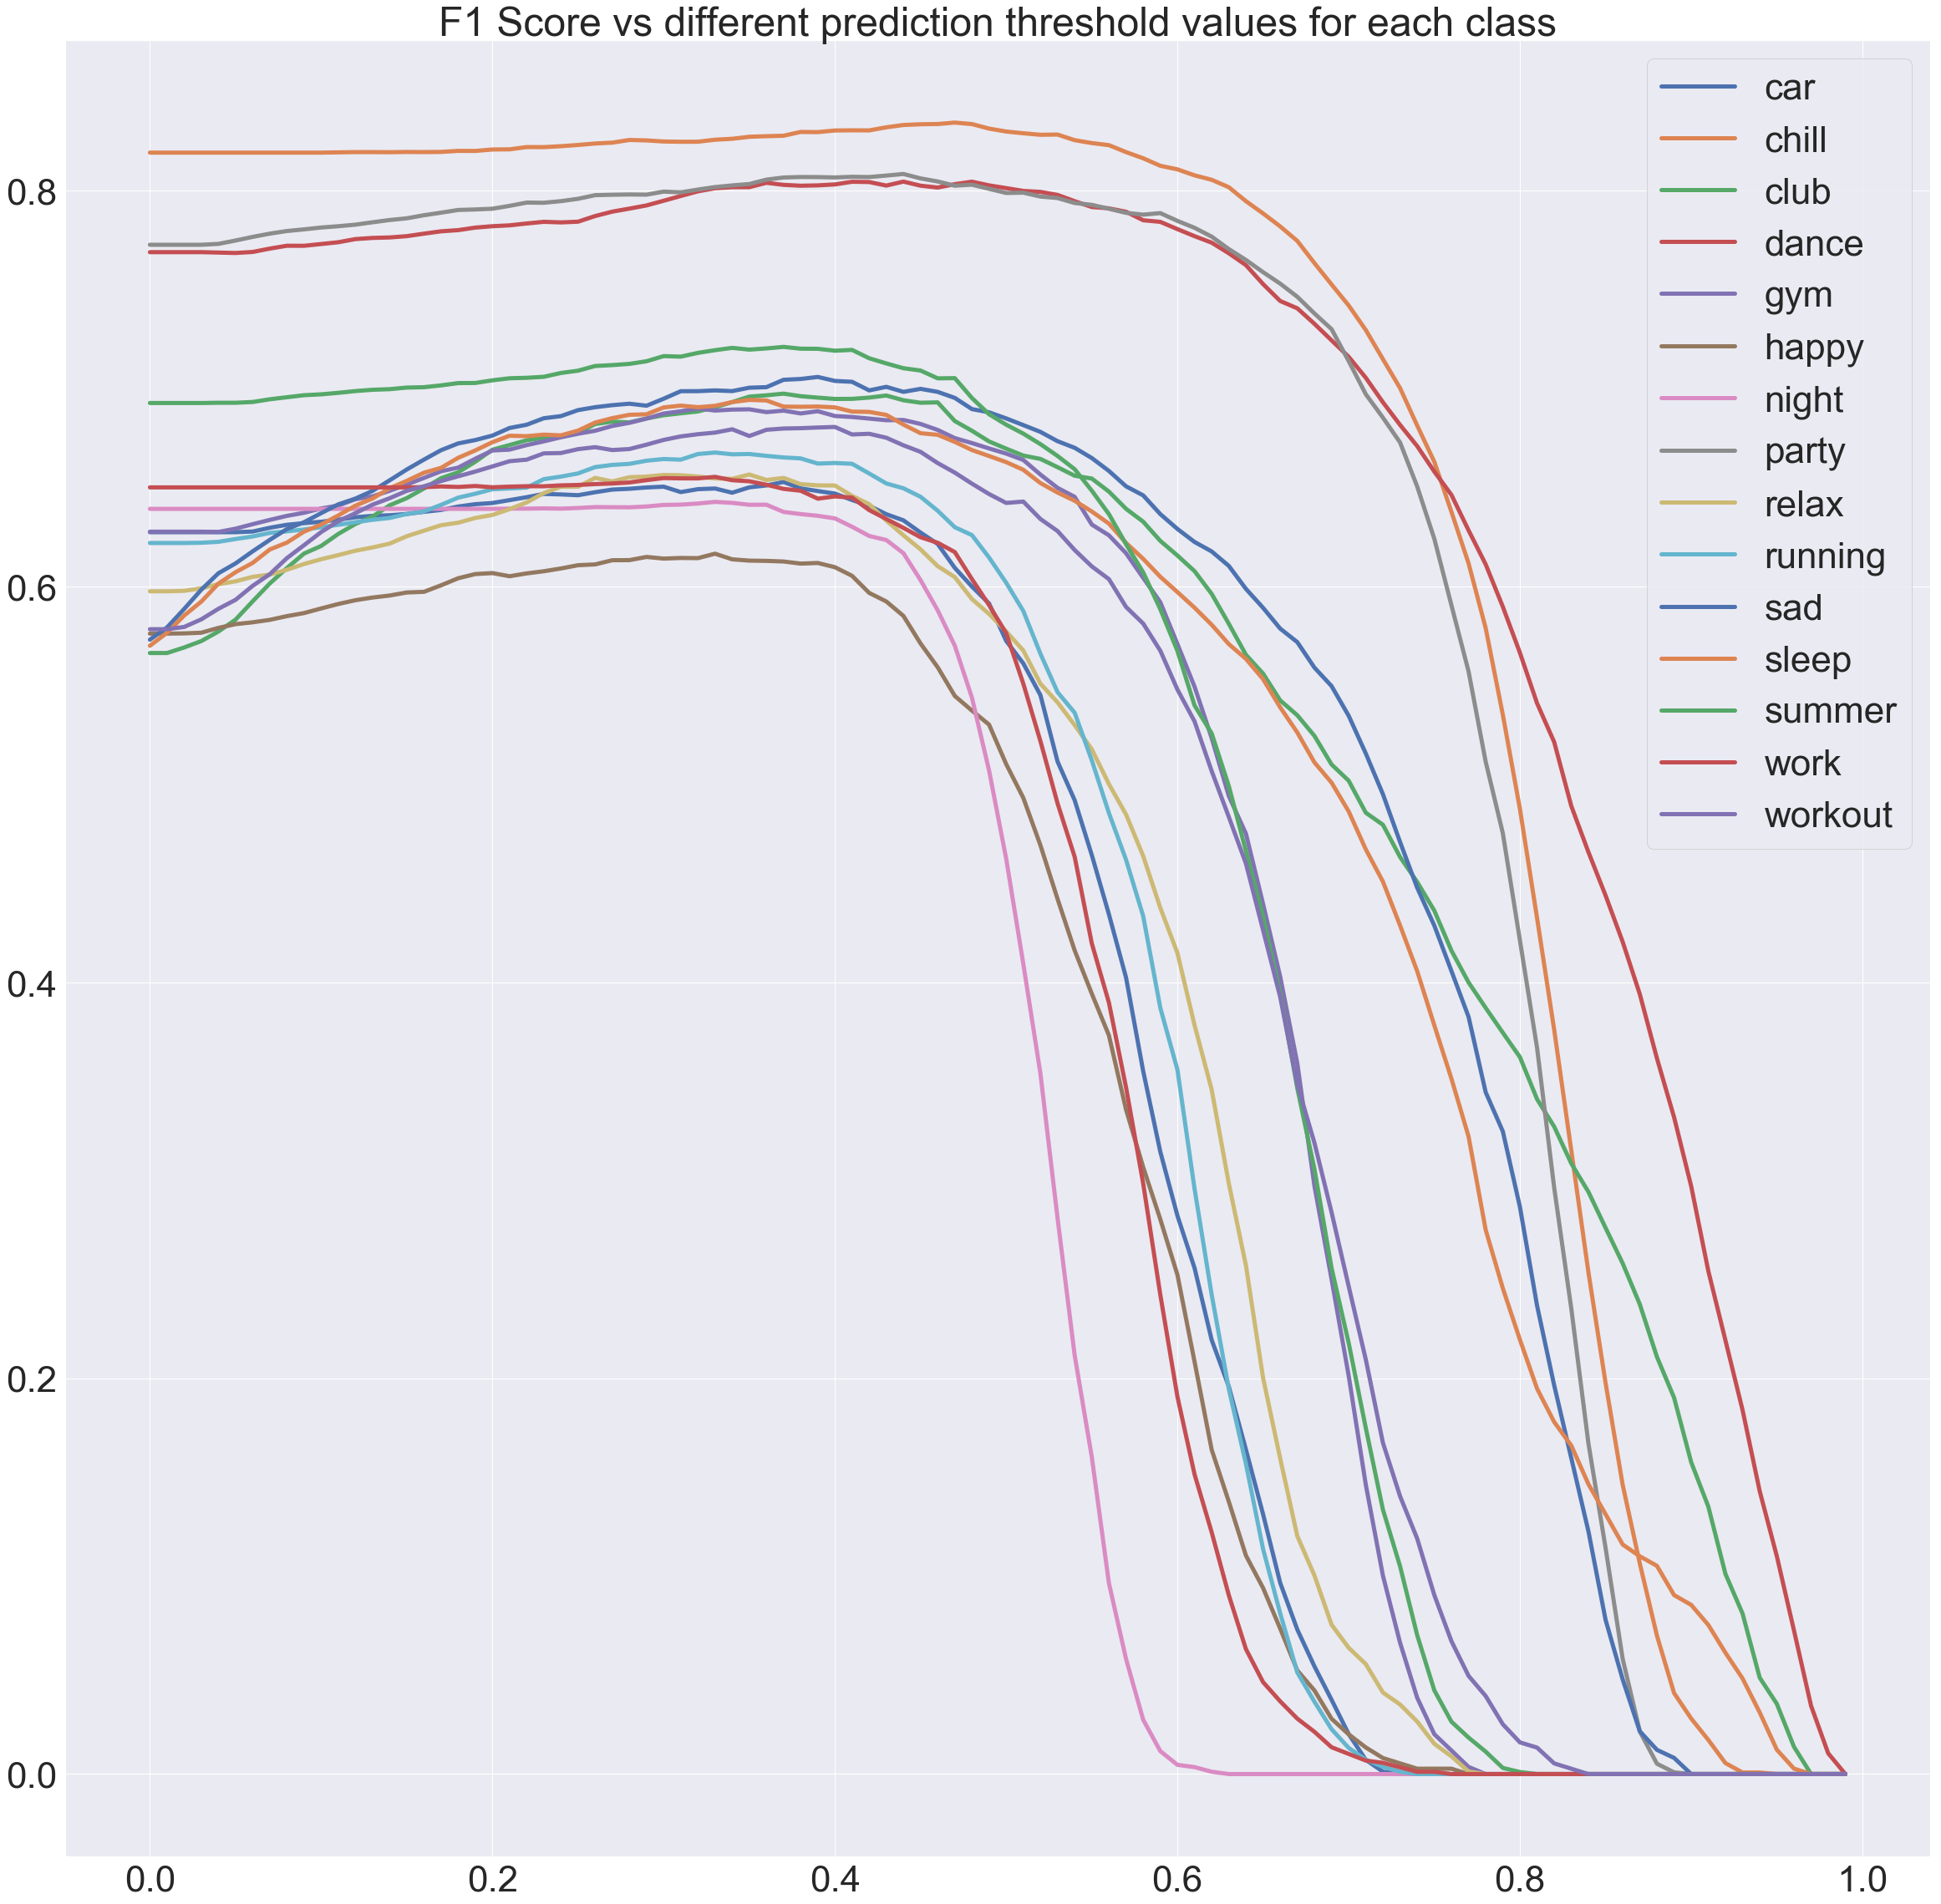

In [230]:
plt.figure(figsize=(40,40))
for idx, x in enumerate(LABELS_LIST):
    plt.plot(thresholds,f1_array[idx,:], linewidth=5)
plt.legend(LABELS_LIST,loc='best')
plt.title("F1 Score vs different prediction threshold values for each class")

In [231]:
threshold_arg = np.argmax(f1_array,axis = 1)
threshold_per_class = thresholds[threshold_arg]

In [232]:
# Now load the actual test set to evaluate the new thresholds
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-10_09-47-11/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [233]:
test_pred = np.zeros_like(test_pred_prob)
for idx,label in enumerate(LABELS_LIST): 
    test_pred[:,idx] = np.round(test_pred_prob[:,idx]-threshold_per_class[idx]+0.5)

In [234]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [235]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [236]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.578026  0.729230  0.726272  0.734654  0.634481   
Ratio of Positive Samples  0.461994  0.691183  0.408168  0.648862  0.473745   

                              happy     night     party     relax   running  \
Model Accuracy             0.601775  0.506286  0.732681  0.648533  0.596105   
Ratio of Positive Samples  0.405621  0.482373  0.638836  0.430685  0.453694   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.762347  0.749856  0.615416  0.538993  0.675898  
Ratio of Positive Samples  0.400526  0.403238  0.532008  0.487468  0.402580

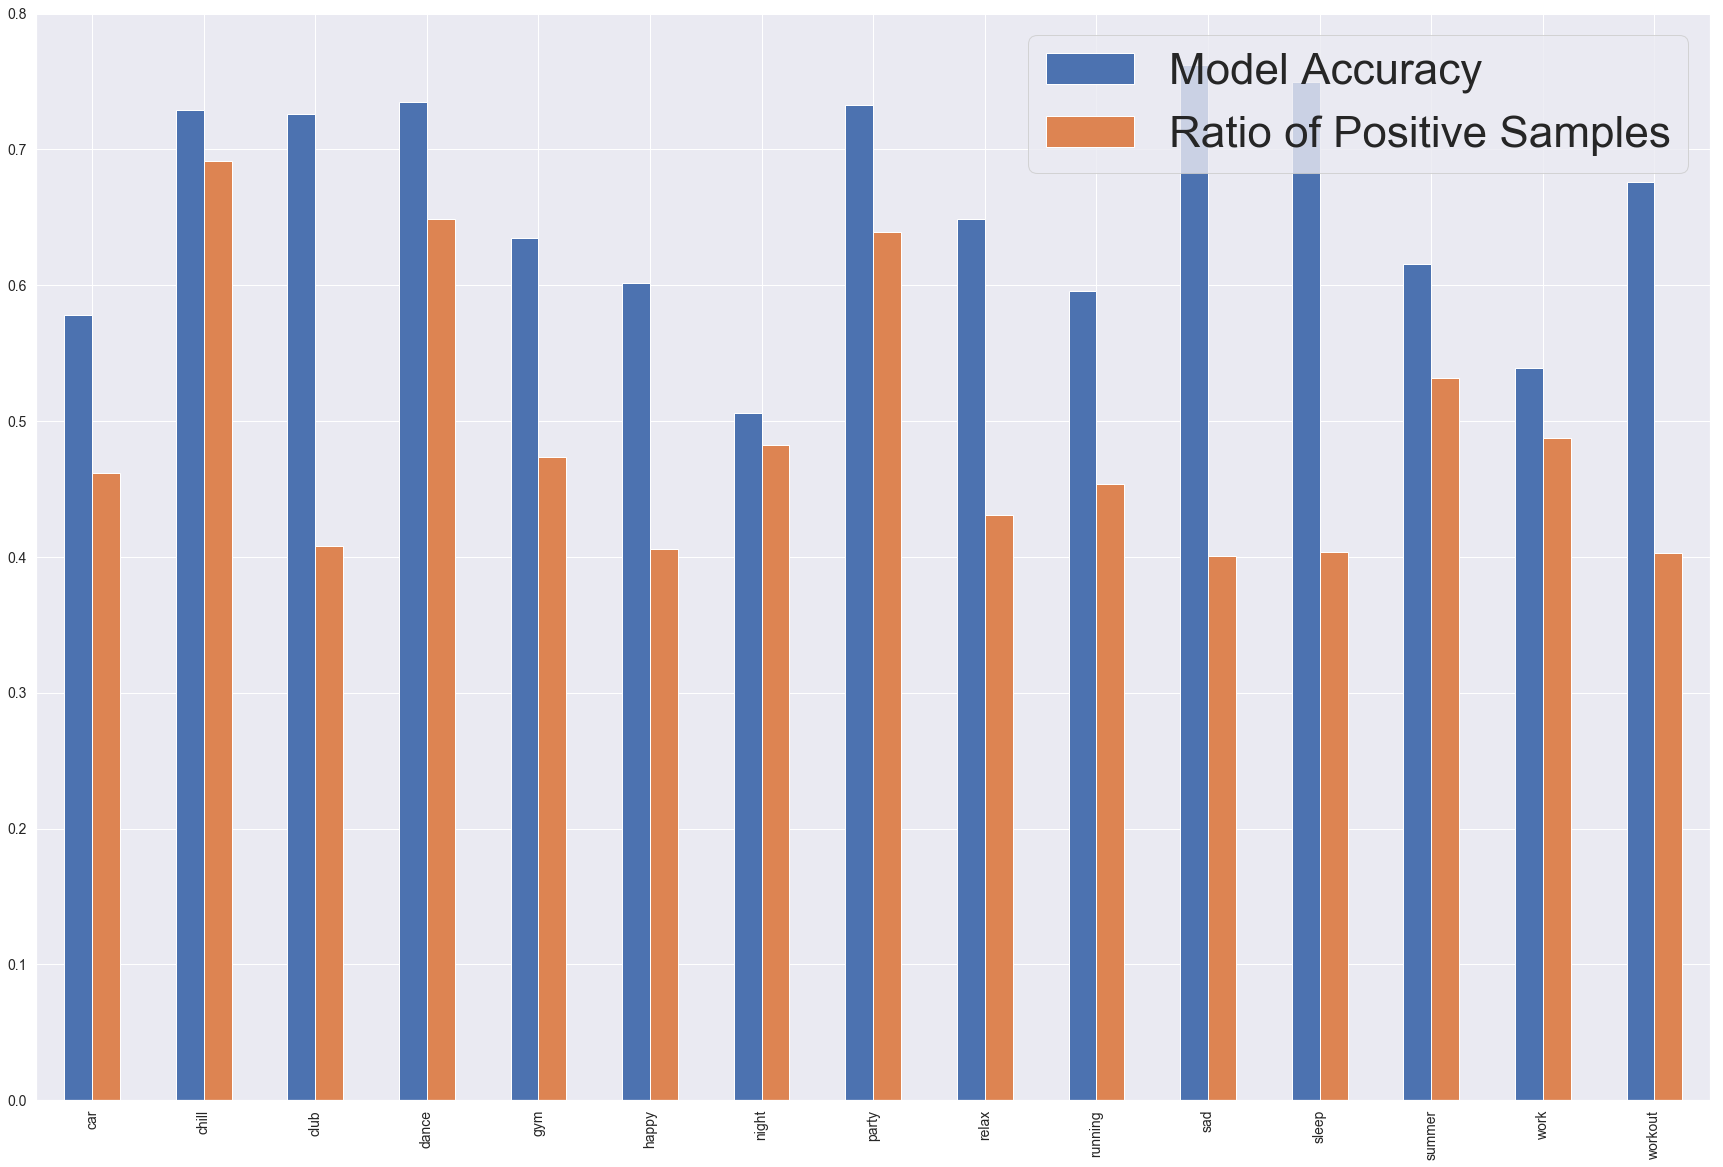

In [174]:
accuracies_df.T.plot.bar(figsize=(30,20),fontsize = 14)


In [237]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.825863  0.931756   
Ratio of Positive Samples                          0.461994  0.691183   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.824844  0.875127   
Ratio of Positive Samples                          0.408168  0.648862   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.904423  0.803282   
Ratio of Positive Samples                          0.473745  0.405621   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.961329  0.889889   
Ratio of Positive Samples                          0.482373  0.638836   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.824843  0.882268   
Ratio of Positive Samples                          0.430685  0.453694   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.789290  0.817607   
Ratio of Positive Samples                          0.400526  0.403238   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.883843  0.908463   
Ratio of Positive Samples                          0.532008  0.487468   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.813227  
Ratio of Positive Samples                          0.402580

In [238]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass
f1_score_perclass = f1_score(test_classes, test_pred,average=None)

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n Average true positive rate: 0.86')

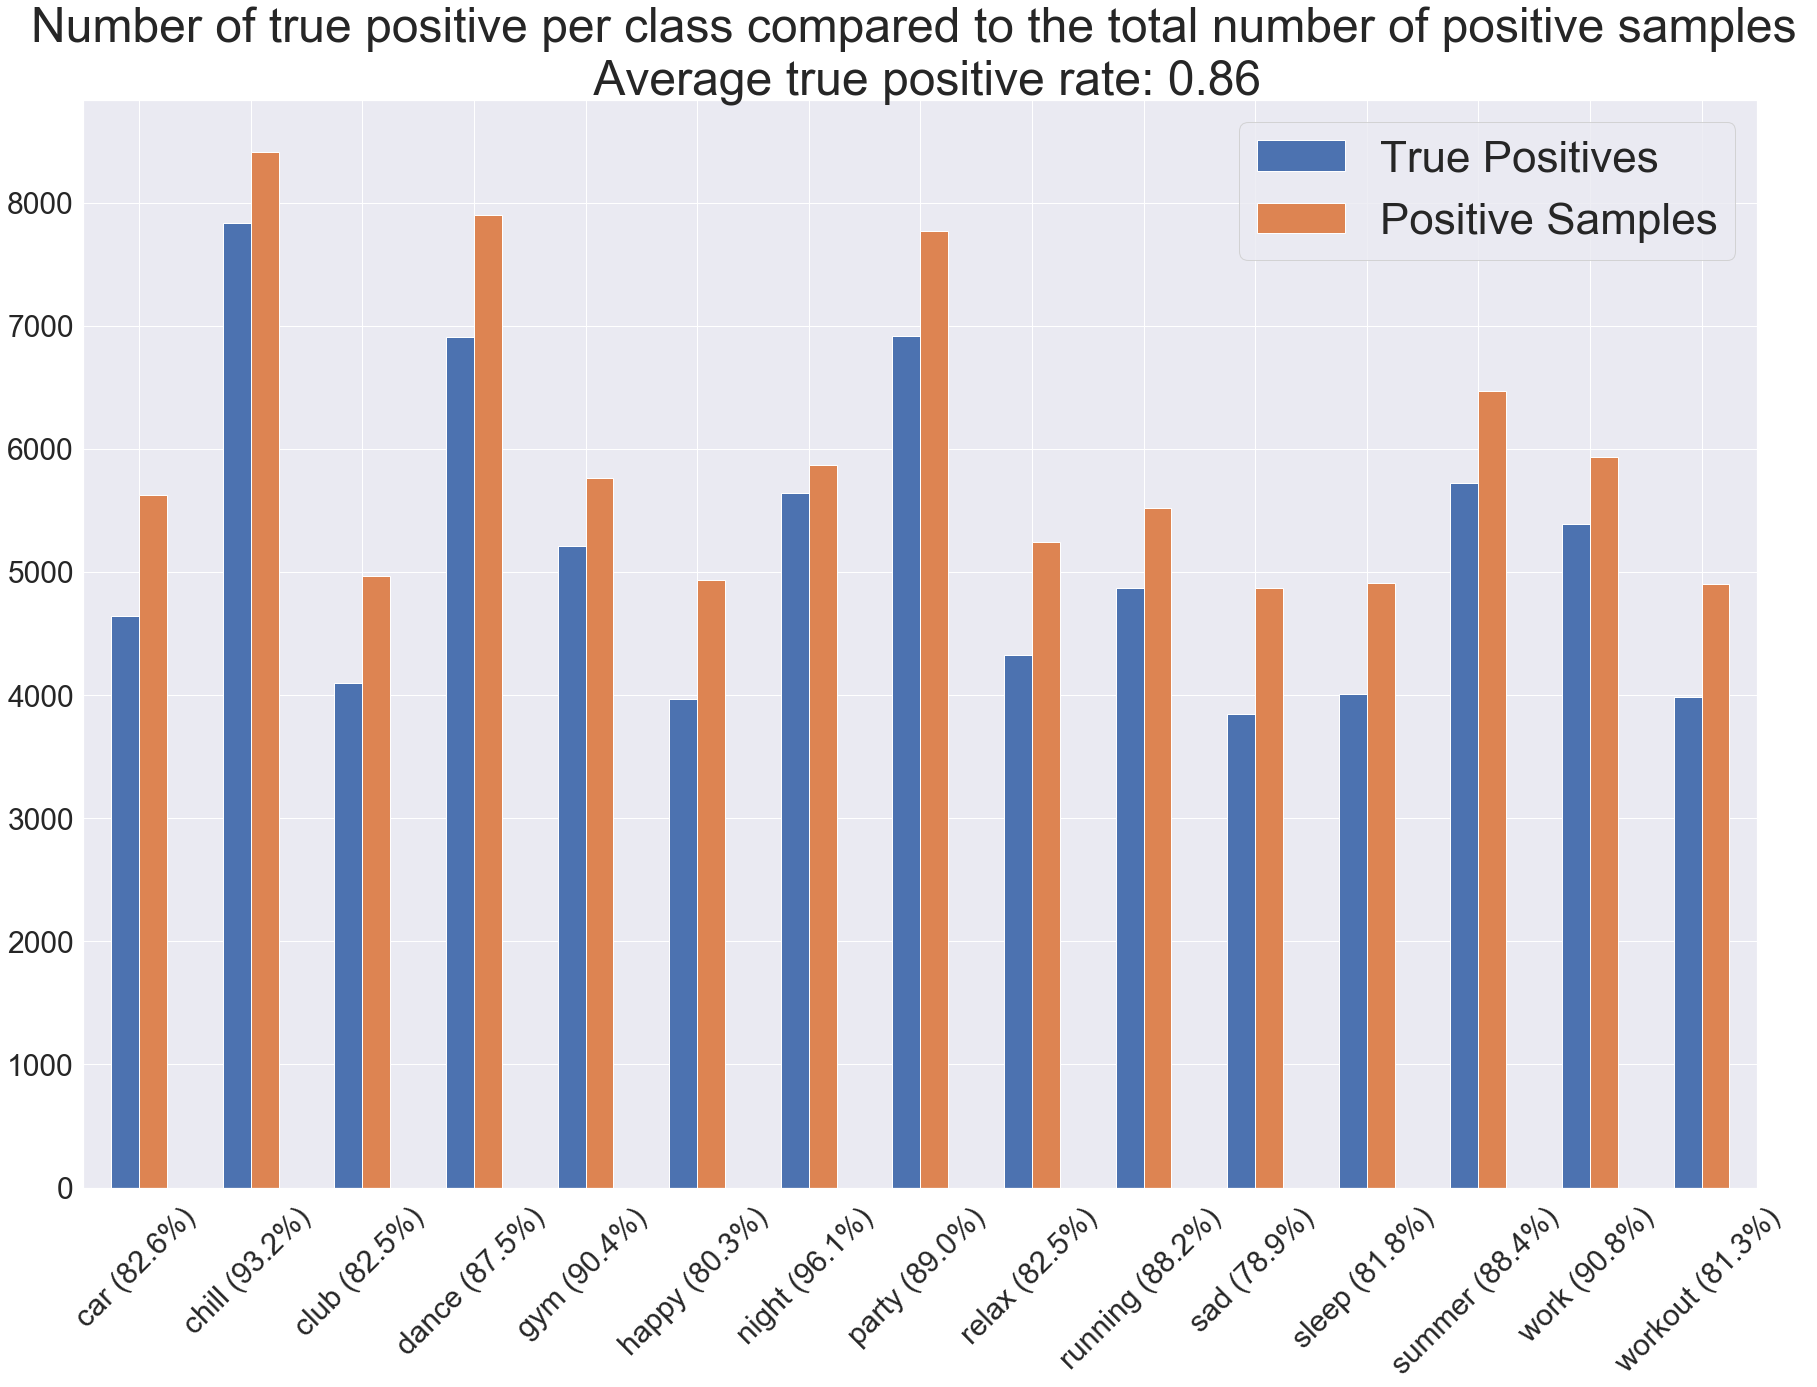

In [239]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [178]:
sum(test_pred)/len(test_pred)

array([0.72306681, 0.86761443, 0.53891035, 0.75215712, 0.74870573,
       0.64426   , 0.93877886, 0.76546964, 0.63127619, 0.75076013,
       0.46938943, 0.50628647, 0.7929986 , 0.85923248, 0.57630044])

## Checking Kappa agreement

In [67]:
agreement_matrix = test_classes + test_pred

In [74]:
from __future__ import division
import numpy as np
from scipy import stats  #get rid of this? need only norm.sf

def fleiss_kappa(table, method='fleiss'):
    """Fleiss' and Randolph's kappa multi-rater agreement measure

    Parameters
    ----------
    table : array_like, 2-D
        assumes subjects in rows, and categories in columns
    method : string
        Method 'fleiss' returns Fleiss' kappa which uses the sample margin
        to define the chance outcome.
        Method 'randolph' or 'uniform' (only first 4 letters are needed)
        returns Randolph's (2005) multirater kappa which assumes a uniform
        distribution of the categories to define the chance outcome.

    Returns
    -------
    kappa : float
        Fleiss's or Randolph's kappa statistic for inter rater agreement

    Notes
    -----
    no variance or hypothesis tests yet

    Interrater agreement measures like Fleiss's kappa measure agreement relative
    to chance agreement. Different authors have proposed ways of defining
    these chance agreements. Fleiss' is based on the marginal sample distribution
    of categories, while Randolph uses a uniform distribution of categories as
    benchmark. Warrens (2010) showed that Randolph's kappa is always larger or
    equal to Fleiss' kappa. Under some commonly observed condition, Fleiss' and
    Randolph's kappa provide lower and upper bounds for two similar kappa_like
    measures by Light (1971) and Hubert (1977).

    References
    ----------
    Wikipedia http://en.wikipedia.org/wiki/Fleiss%27_kappa

    Fleiss, Joseph L. 1971. "Measuring Nominal Scale Agreement among Many
    Raters." Psychological Bulletin 76 (5): 378-82.
    https://doi.org/10.1037/h0031619.

    Randolph, Justus J. 2005 "Free-Marginal Multirater Kappa (multirater
    K [free]): An Alternative to Fleiss' Fixed-Marginal Multirater Kappa."
    Presented at the Joensuu Learning and Instruction Symposium, vol. 2005
    https://eric.ed.gov/?id=ED490661

    Warrens, Matthijs J. 2010. "Inequalities between Multi-Rater Kappas."
    Advances in Data Analysis and Classification 4 (4): 271-86.
    https://doi.org/10.1007/s11634-010-0073-4.

    """

    table = 1.0 * np.asarray(table)   #avoid integer division
    n_sub, n_cat =  table.shape
    n_total = table.sum()
    n_rater = table.sum(1)
    n_rat = n_rater.max()
    #assume fully ranked
    assert n_total == n_sub * n_rat

    #marginal frequency  of categories
    p_cat = table.sum(0) / n_total

    table2 = table * table
    p_rat = (table2.sum(1) - n_rat) / (n_rat * (n_rat - 1.))
    p_mean = p_rat.mean()

    if method == 'fleiss':
        p_mean_exp = (p_cat*p_cat).sum()
    elif method.startswith('rand') or method.startswith('unif'):
        p_mean_exp = 1 / n_cat

    kappa = (p_mean - p_mean_exp) / (1- p_mean_exp)
    return kappa

In [75]:
fleiss_kappa(agreement_matrix)

-0.08217380731632092

## Coocurance graph

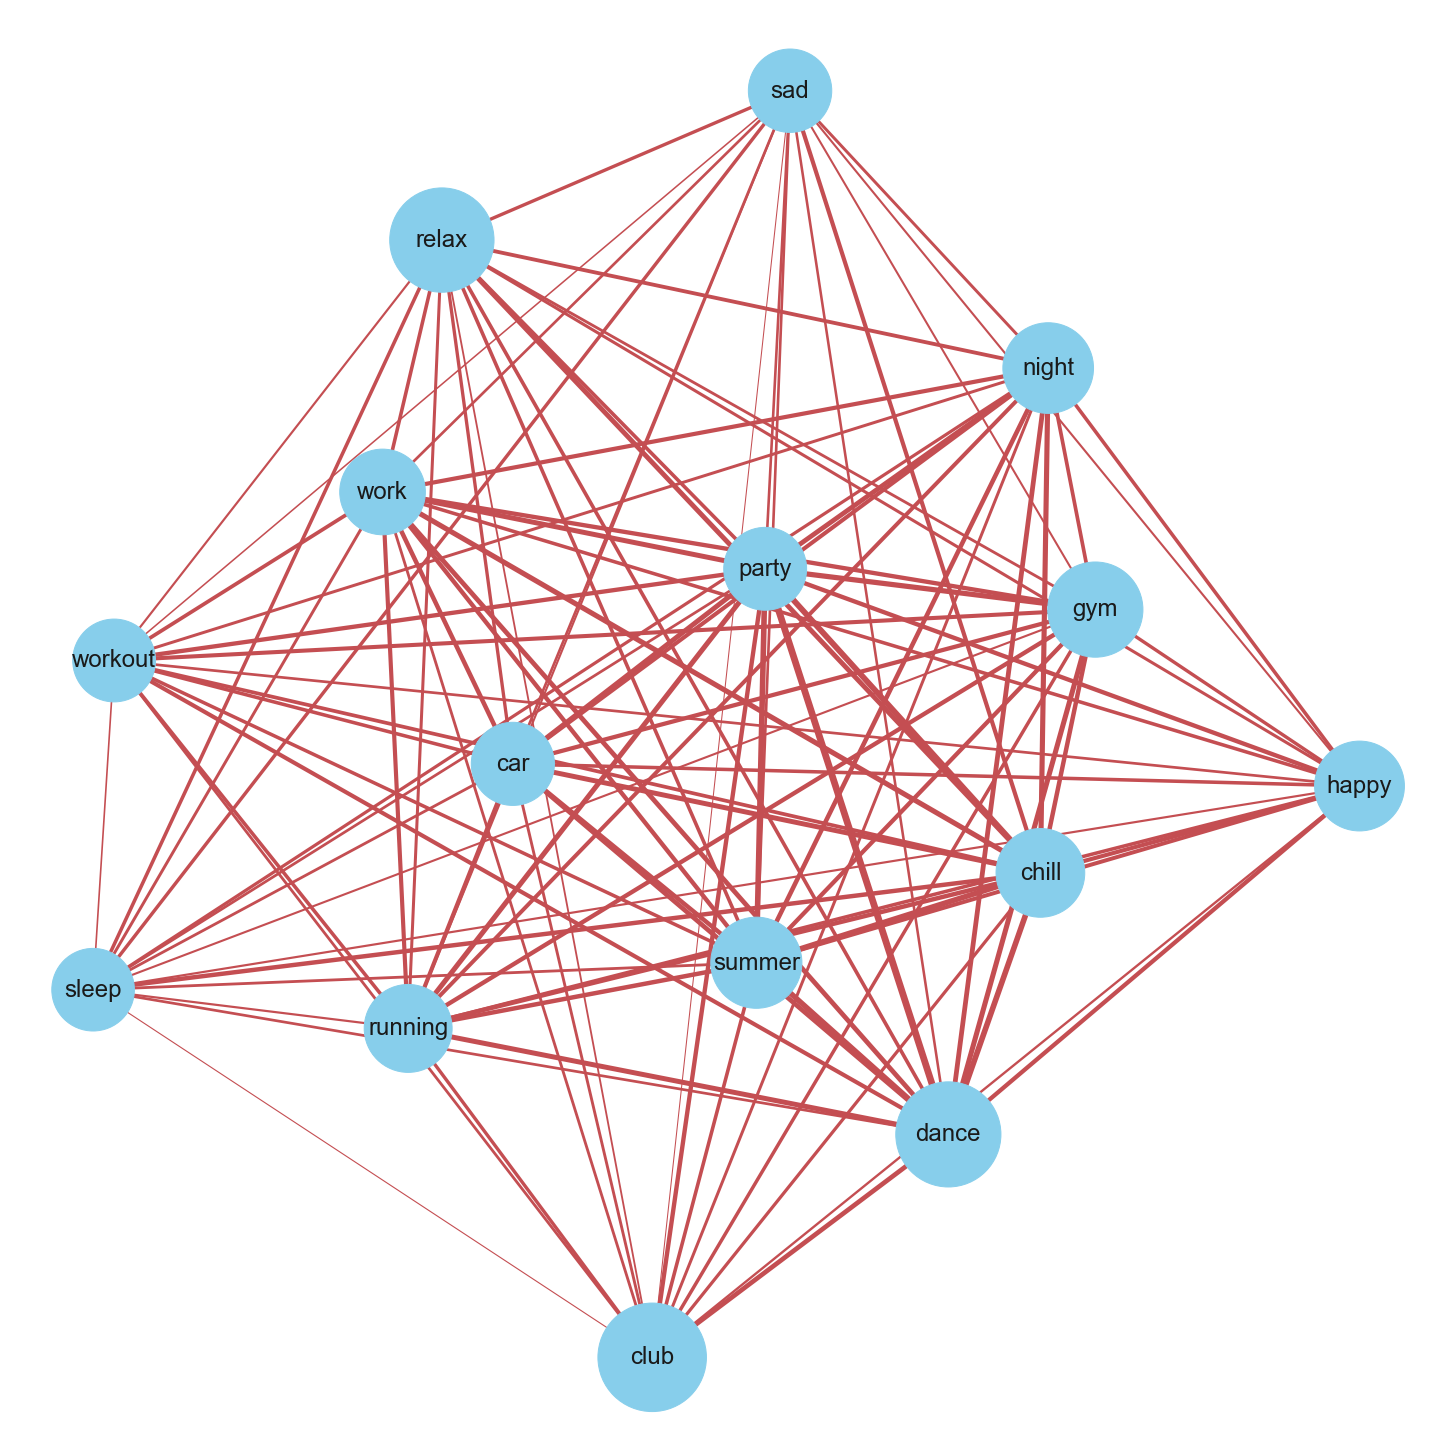

In [153]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(LABELS_LIST)
node_size = [coocurrances[x][x]*1.4 for x in LABELS_LIST]
node_names = {x:x for x in LABELS_LIST}

for x in LABELS_LIST:
    for y in LABELS_LIST:
        if x!= y: 
            G.add_edge(x,y,color = 'r' , weight = coocurrances[x][y]/1000)


#pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,20)) 
nx.draw(G, edges=edges, edge_color=colors, width=weights, node_size = node_size, 
        labels = node_names, font_size = 24, node_color="skyblue")

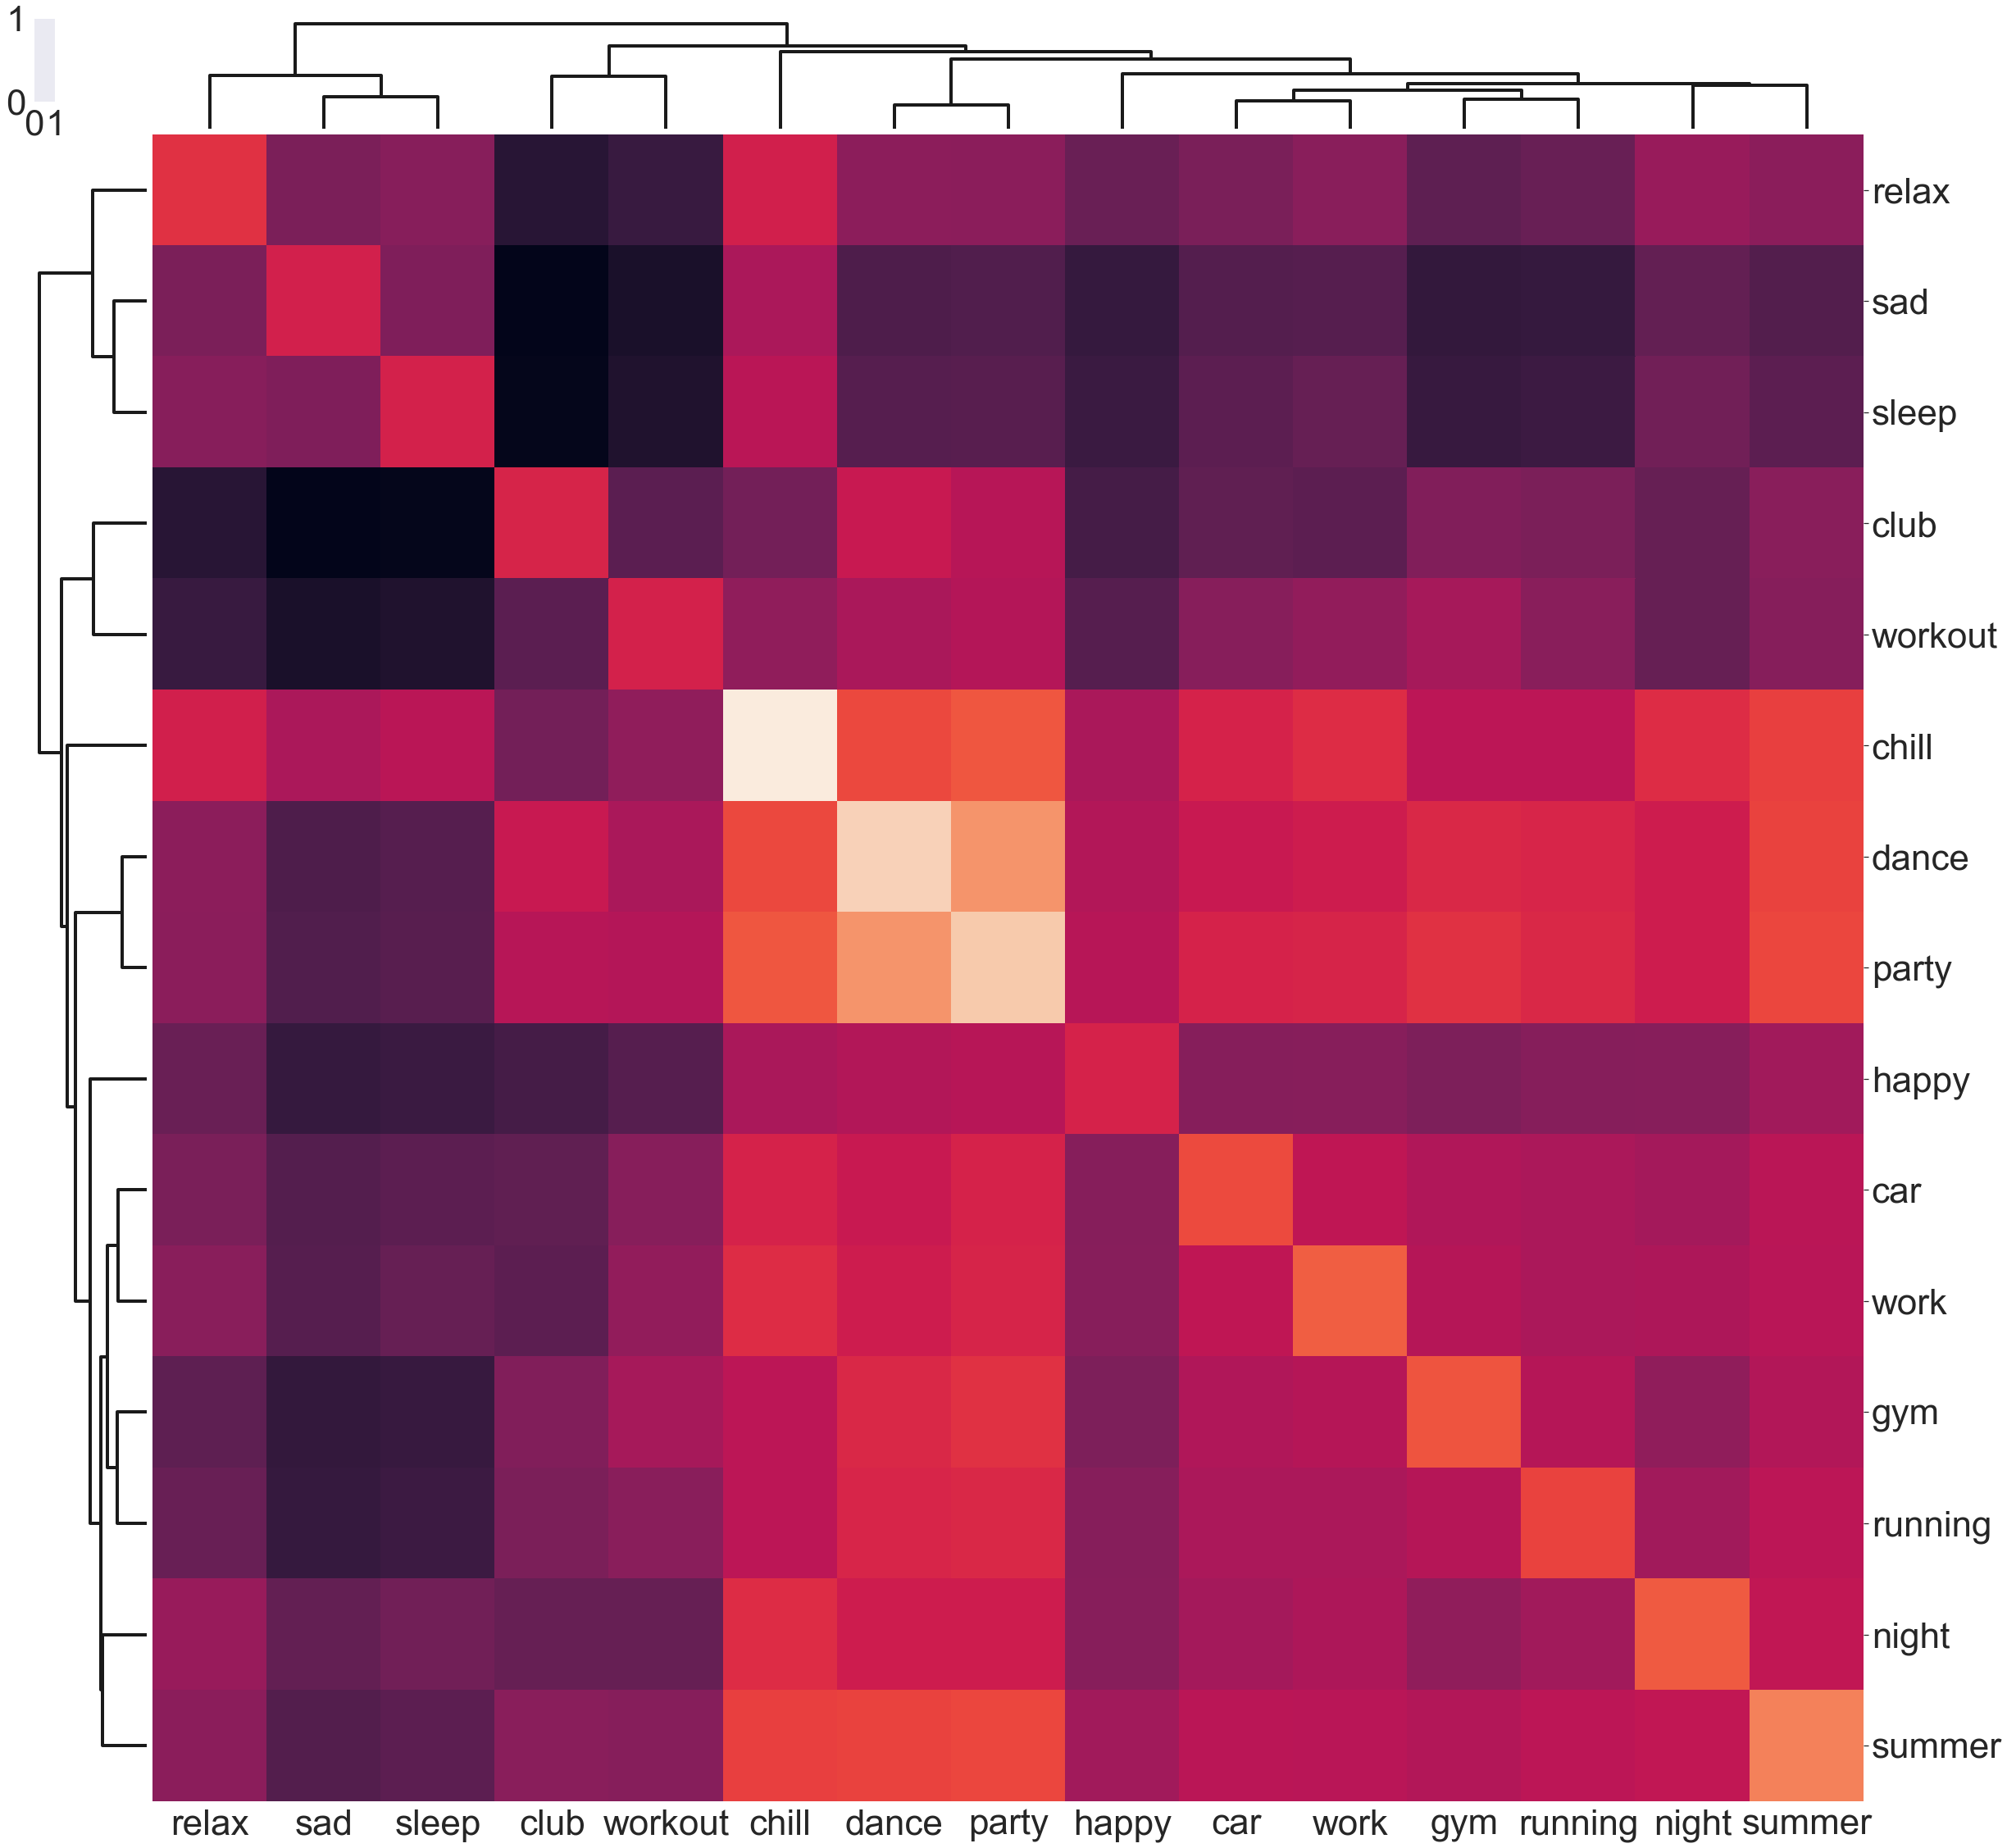

In [151]:
g = sn.clustermap(coocurrances, figsize=(40, 40),cbar = None)
for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(4)
for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(4)